In [144]:
# This notebook was written for Python 2.7
import FlowCytometryTools as fct
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
from operator import truediv
from sklearn.model_selection import train_test_split
from sklearn import mixture
import scipy.optimize
from scipy import stats

%matplotlib inline

In [145]:
blues = sns.color_palette('Blues', 9)
reds = sns.color_palette('Reds', 9)
greens = sns.color_palette('Greens', 9)
oranges = sns.color_palette('Oranges', 9)
grays = sns.color_palette('Greys', 9)


bw = {'axis.labelcolor': 'white', 'xtick.color': 'white', 'ytick.color': 'white',
     'grid.color': 'white', 'axes.edgecolor': 'white', 'axes.facecolor': 'black',
     'text.color': 'white', 'axes.labelcolor': 'white', 'figure.facecolor' : 'black',
     'xtick.major.size': 5.0, 'xtick.minor.size': 5.0, 
      'ytick.major.size': 5.0, 'ytick.minor.size': 5.0, 'axes.linewidth': 1.0}

bw_tickless = {'axis.labelcolor': 'white', 'grid.color': 'white', 
               'axes.edgecolor': 'white', 'axes.facecolor': 'black', 'text.color': 'white', 
               'axes.labelcolor': 'white', 'figure.facecolor' : 'black', 'axes.linewidth': 1.0,
              'xtick.color': 'white', 'ytick.color': 'white'}

## Data import from .fcs files
## Gate on forward v side scatter

In [146]:
datafile = '2019_05_11/yLB365-373_0gluc_tplus.fcs'
sample = fct.FCMeasurement(ID = 'yLB365-373_plus', datafile = datafile)

#sample.view_interactively()

In [147]:
scatter_gate_0 = fct.PolyGate([(1.641e+04, 9.464e+03),
                               (2.739e+04, 1.552e+05),
                               (7.996e+04, 2.443e+05),
                               (1.735e+05, 2.616e+05),
                               (2.411e+05, 2.582e+05),
                               (2.517e+05, 1.852e+05),
                               (2.300e+05, 9.845e+04),
                               (1.875e+05, 4.174e+04),
                               (1.214e+05, 1.975e+04),
                               (7.417e+04, 1.165e+04),
                               (1.641e+04, 9.464e+03),
                               (1.641e+04, 9.464e+03),
                               (1.641e+04, 9.464e+03),
                               (1.641e+04, 9.464e+03)],
                              ('FSC-A', 'SSC-A'), region='in', name='scattergate')

In [148]:
datafile = '2019_05_11/yLB365-373_2gluc_t0.fcs'
sample = fct.FCMeasurement(ID = 'yLB365-373_0', datafile = datafile)

#sample.view_interactively()

In [149]:
scatter_gate_2 = fct.PolyGate([(1.592e+04, 5.236e+04),
                               (2.872e+04, 1.278e+05),
                               (6.298e+04, 2.556e+05),
                               (1.485e+05, 2.580e+05),
                               (2.129e+05, 2.568e+05),
                               (2.272e+05, 1.700e+05),
                               (2.125e+05, 9.045e+04),
                               (1.372e+05, 3.259e+04),
                               (1.130e+05, 7.275e+03),
                               (6.520e+04, 3.659e+03),
                               (2.872e+04, 3.659e+03),
                               (1.592e+04, 5.236e+04)],
                              ('FSC-A', 'SSC-A'), region='in', name='scattergate')

In [150]:
g0_gated_0511 = pd.DataFrame()
time_stamps = ['plus', '0', '2', '4', '6', '8', '10', '12', '24']
times = [-1, 0, 2, 4, 6, 8, 10, 12, 24]

for t in range(len(times)):
    datafile = '2019_05_11/yLB365-373_0gluc_t' + time_stamps[t] + '.fcs'
    sample = fct.FCMeasurement(ID = 'yLB365-373_' + time_stamps[t], datafile = datafile)
    sample = sample.gate(scatter_gate_0)
    subset = sample.data[['FSC-A', 'SSC-A', 'FSC-H', 'SSC-H', 'FSC-W', 'SSC-W',
                         'FITC-A', 'PE-Cy5-A']]
    subset['time'] = times[t]
    g0_gated_0511 = pd.concat([g0_gated_0511, subset])

/Users/laurabagamery/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [151]:
g2_gated_0511 = pd.DataFrame()
time_stamps = ['0', '2', '4', '6', '8', '10', '12', '24']
times = [0, 2, 4, 6, 8, 10, 12, 24]

for t in range(len(times)):
    datafile = '2019_05_11/yLB365-373_2gluc_t' + time_stamps[t] + '.fcs'
    sample = fct.FCMeasurement(ID = 'yLB365-373_' + time_stamps[t], datafile = datafile)
    sample = sample.gate(scatter_gate_2)
    subset = sample.data[['FSC-A', 'SSC-A', 'FSC-H', 'SSC-H', 'FSC-W', 'SSC-W',
                         'FITC-A', 'PE-Cy5-A']]
    subset['time'] = times[t]
    g2_gated_0511 = pd.concat([g2_gated_0511, subset])

/Users/laurabagamery/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


In [152]:
g0_gated_0511_pos = g0_gated_0511[g0_gated_0511['FITC-A'] > 0]
g0_gated_0511_pos[g0_gated_0511_pos['PE-Cy5-A'] <= 0] = 1

g2_gated_0511_pos = g2_gated_0511[g2_gated_0511['FITC-A'] > 0]
g2_gated_0511_pos[g2_gated_0511_pos['PE-Cy5-A'] <= 0] = 1


/Users/laurabagamery/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/laurabagamery/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [153]:
datafile = '2019_05_15/yLB365-373_0gluc_tplus.fcs'
sample = fct.FCMeasurement(ID = 'yLB365-373_plus', datafile = datafile)

#sample.view_interactively()

In [154]:
scatter_gate_0g_0515 = fct.PolyGate([(1.469e+04, 1.870e+04),
                                     (2.365e+04, 1.218e+05),
                                     (6.911e+04, 2.074e+05),
                                     (1.288e+05, 2.544e+05),
                                     (2.022e+05, 2.616e+05),
                                     (2.471e+05, 2.459e+05),
                                     (2.462e+05, 1.628e+05),
                                     (2.059e+05, 9.283e+04),
                                     (1.397e+05, 4.581e+04),
                                     (8.520e+04, 8.431e+03),
                                     (5.253e+04, 2.403e+03),
                                     (2.037e+04, 5.408e+03),
                                     (1.469e+04, 1.870e+04)],
                                    ('FSC-A', 'SSC-A'), region='in', name='scattergate0_0515')

In [155]:
g0_gated_0515 = pd.DataFrame()
time_stamps = ['plus', '0', '2', '4', '6', '8', '10', '12', '24']
times = [-1, 0, 2, 4, 6, 8, 10, 12, 24]

for t in range(len(times)):
    datafile = '2019_05_15/yLB365-373_0gluc_t' + time_stamps[t] + '.fcs'
    sample = fct.FCMeasurement(ID = 'yLB365-373_' + time_stamps[t], datafile = datafile)
    sample = sample.gate(scatter_gate_0g_0515)
    subset = sample.data[['FSC-A', 'SSC-A', 'FSC-H', 'SSC-H', 'FSC-W', 'SSC-W',
                         'FITC-A', 'PE-Cy5-A']]
    subset['time'] = times[t]
    g0_gated_0515 = pd.concat([g0_gated_0515, subset])

In [156]:
datafile = '2019_05_15/yLB365-373_2gluc_t0.fcs'
sample = fct.FCMeasurement(ID = 'yLB365-373_0', datafile = datafile)

#sample.view_interactively()

In [157]:
scatter_gate_2g_0515 = fct.PolyGate([(1.392e+04, 2.046e+04),
                                     (2.391e+04, 1.097e+05),
                                     (6.674e+04, 2.339e+05),
                                     (8.724e+04, 2.604e+05),
                                     (1.612e+05, 2.616e+05),
                                     (2.185e+05, 2.616e+05),
                                     (2.485e+05, 1.941e+05),
                                     (2.138e+05, 1.193e+05),
                                     (1.576e+05, 5.301e+04),
                                     (1.077e+05, 9.603e+03),
                                     (6.721e+04, 9.603e+03),
                                     (3.581e+04, 1.081e+04),
                                     (2.249e+04, 1.322e+04),
                                     (1.392e+04, 1.925e+04)],
                                    ('FSC-A', 'SSC-A'), region='in', name='scattergate2_0515')


In [158]:
g2_gated_0515 = pd.DataFrame()
time_stamps = ['0', '2', '4', '6', '8', '10', '12', '24']
times = [0, 2, 4, 6, 8, 10, 12, 24]

for t in range(len(times)):
    datafile = '2019_05_15/yLB365-373_2gluc_t' + time_stamps[t] + '.fcs'
    sample = fct.FCMeasurement(ID = 'yLB365-373_' + time_stamps[t], datafile = datafile)
    sample = sample.gate(scatter_gate_2g_0515)
    subset = sample.data[['FSC-A', 'SSC-A', 'FSC-H', 'SSC-H', 'FSC-W', 'SSC-W',
                         'FITC-A', 'PE-Cy5-A']]
    subset['time'] = times[t]
    g2_gated_0515 = pd.concat([g2_gated_0515, subset])

In [159]:
g0_gated_0515_pos = g0_gated_0515[g0_gated_0515['FITC-A'] > 0]
g0_gated_0515_pos[g0_gated_0515_pos['PE-Cy5-A'] <= 0] = 1

g2_gated_0515_pos = g2_gated_0515[g2_gated_0515['FITC-A'] > 0]
g2_gated_0515_pos[g2_gated_0515_pos['PE-Cy5-A'] <= 0] = 1

/Users/laurabagamery/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/laurabagamery/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [160]:
datafile = '2019_05_17/yLB365-373_0gluc_tplus.fcs'
sample = fct.FCMeasurement(ID = 'yLB365-373_plus', datafile = datafile)

#sample.view_interactively()

In [161]:
scatter_gate_0g_0517 = fct.PolyGate([(1.425e+04, 2.274e+04),
                                     (2.033e+04, 1.121e+05),
                                     (5.212e+04, 2.170e+05),
                                     (8.817e+04, 2.568e+05),
                                     (1.736e+05, 2.580e+05),
                                     (2.381e+05, 2.568e+05),
                                     (2.457e+05, 1.688e+05),
                                     (2.044e+05, 6.750e+04),
                                     (1.446e+05, 1.566e+04),
                                     (9.339e+04, 7.215e+03),
                                     (3.883e+04, 9.627e+03),
                                     (1.985e+04, 7.244e+03)],
                                    ('FSC-A', 'SSC-A'), region='in', name='scattergate')

In [162]:
g0_gated_0517 = pd.DataFrame()
time_stamps = ['plus', '0', '2', '4', '6', '8', '10', '12', '24']
times = [-1, 0, 2, 4, 6, 8, 10, 12, 24]

for t in range(len(times)):
    datafile = '2019_05_17/yLB365-373_0gluc_t' + time_stamps[t] + '.fcs'
    sample = fct.FCMeasurement(ID = 'yLB365-373_' + time_stamps[t], datafile = datafile)
    sample = sample.gate(scatter_gate_0g_0517)
    subset = sample.data[['FSC-A', 'SSC-A', 'FSC-H', 'SSC-H', 'FSC-W', 'SSC-W',
                         'FITC-A', 'PE-Cy5-A']]
    subset['time'] = times[t]
    g0_gated_0517 = pd.concat([g0_gated_0517, subset])

In [163]:
datafile = '2019_05_17/yLB365-373_2gluc_t0.fcs'
sample = fct.FCMeasurement(ID = 'yLB365-373_0', datafile = datafile)

#sample.view_interactively()

In [164]:
scatter_gate_2g_0517 = fct.PolyGate([(1.130e+04, 2.159e+04),
                                    (1.887e+04, 1.084e+05),
                                    (6.867e+04, 2.592e+05),
                                    (1.126e+05, 2.592e+05),
                                    (2.102e+05, 2.604e+05),
                                    (2.438e+05, 1.772e+05),
                                    (2.002e+05, 3.848e+04),
                                    (1.155e+05, 1.074e+04),
                                    (5.060e+04, 3.499e+03),
                                    (2.124e+04, 7.117e+03)],
                                   ('FSC-A', 'SSC-A'), region='in', name='scattergate')

In [165]:
g2_gated_0517 = pd.DataFrame()
time_stamps = ['0', '2', '4', '6', '8', '10', '12', '24']
times = [0, 2, 4, 6, 8, 10, 12, 24]

for t in range(len(times)):
    datafile = '2019_05_17/yLB365-373_2gluc_t' + time_stamps[t] + '.fcs'
    sample = fct.FCMeasurement(ID = 'yLB365-373_' + time_stamps[t], datafile = datafile)
    sample = sample.gate(scatter_gate_2g_0517)
    subset = sample.data[['FSC-A', 'SSC-A', 'FSC-H', 'SSC-H', 'FSC-W', 'SSC-W',
                         'FITC-A', 'PE-Cy5-A']]
    subset['time'] = times[t]
    g2_gated_0517 = pd.concat([g2_gated_0517, subset])

In [166]:
g0_gated_0517_pos = g0_gated_0517[g0_gated_0517['FITC-A'] > 0]
g0_gated_0517_pos[g0_gated_0517_pos['PE-Cy5-A'] <= 0] = 1

g2_gated_0517_pos = g2_gated_0517[g2_gated_0517['FITC-A'] > 0]
g2_gated_0517_pos[g2_gated_0517_pos['PE-Cy5-A'] <= 0] = 1


/Users/laurabagamery/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/laurabagamery/opt/anaconda3/envs/py27/lib/python2.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


## Taking a look at the data

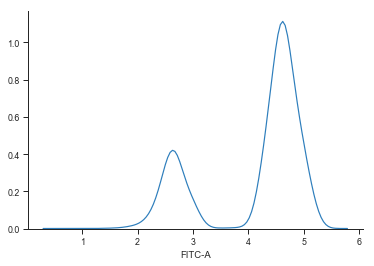

In [167]:
sns.set_context('paper')
sns.set_style('ticks')

sns.distplot(np.log10(g0_gated_0511_pos[g0_gated_0511_pos['time'] == 24]['FITC-A']), hist = False, color = blues[6])

sns.despine()

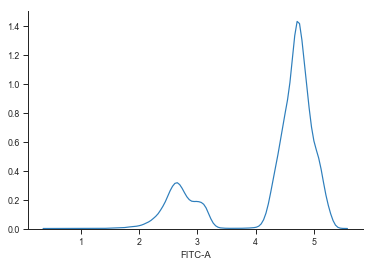

In [168]:
sns.set_context('paper')
sns.set_style('ticks')

sns.distplot(np.log10(g0_gated_0515_pos[g0_gated_0515_pos['time'] == 24]['FITC-A']), hist = False, color = blues[6])

sns.despine()

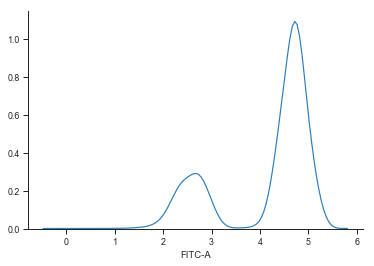

In [169]:
sns.set_context('paper')
sns.set_style('ticks')

sns.distplot(np.log10(g0_gated_0517_pos[g0_gated_0517_pos['time'] == 24]['FITC-A']), hist = False, color = blues[6])

sns.despine()

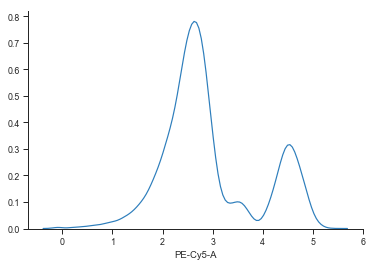

In [170]:
sns.set_context('paper')
sns.set_style('ticks')

sns.distplot(np.log10(g0_gated_0511_pos[g0_gated_0511_pos['time'] == 24]['PE-Cy5-A']), hist = False, color = blues[6])

sns.despine()

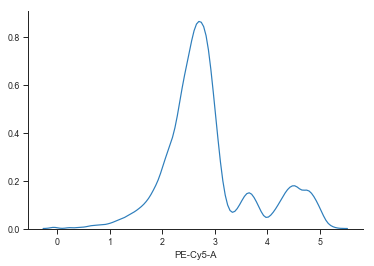

In [171]:
sns.set_context('paper')
sns.set_style('ticks')

sns.distplot(np.log10(g0_gated_0515_pos[g0_gated_0515_pos['time'] == 24]['PE-Cy5-A']), hist = False, color = blues[6])

sns.despine()

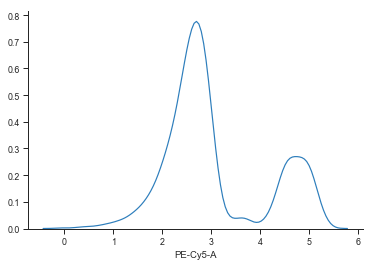

In [172]:
sns.set_context('paper')
sns.set_style('ticks')

sns.distplot(np.log10(g0_gated_0517_pos[g0_gated_0517_pos['time'] == 24]['PE-Cy5-A']), hist = False, color = blues[6])

sns.despine()

Text(0.5,1,'24 hr')

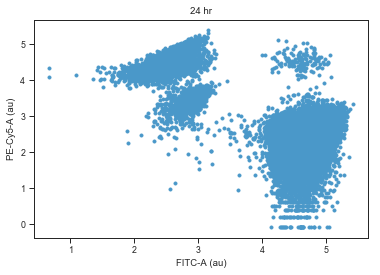

In [173]:
sns.set_context('paper')
sns.set_style('ticks')

f, ax = plt.subplots()

plt.scatter(np.log10(g0_gated_0511_pos[g0_gated_0511_pos['time'] == 24]['FITC-A']),
            np.log10(g0_gated_0511_pos[g0_gated_0511_pos['time'] == 24]['PE-Cy5-A']),
            color = blues[5], s = 10)

ax.set_xlabel('FITC-A (au)')
ax.set_ylabel('PE-Cy5-A (au)')
ax.set_title('24 hr')

## Calculating ratios of each cell type

In [174]:
def calculate_states(df, time):
    subset_df = df[df['time'] == time][['PE-Cy5-A', 'FITC-A']]
    subset_df['logCy5'] = np.log10(subset_df['PE-Cy5-A'])
    subset_df['logFITC'] = np.log10(subset_df['FITC-A'])
    #subset = np.array(subset_df[['logCy5', 'logFITC']])
    subset = np.array(subset_df['logFITC'])
    
    gmm = mixture.GaussianMixture(n_components = 2, covariance_type = 'full')
    gmm.fit(subset.reshape(-1,1))
    
    clusters = gmm.predict(subset.reshape(-1,1))
    
    #df_assignments = pd.DataFrame({'logCy5': subset[:, 0], 'logFITC': subset[:, 1], 'cluster' : clusters})
    df_assignments = pd.DataFrame({'logFITC': subset, 'logCy5': subset_df['logCy5'], 'cluster' : clusters})


    
    mean0 = df_assignments[df_assignments['cluster'] == 0]['logFITC'].mean()
    mean1 = df_assignments[df_assignments['cluster'] == 1]['logFITC'].mean()
    
    if mean0 < mean1:
        wt = 0
        hxk2 = 1
    elif mean0 > mean1:
        wt = 1
        hxk2 = 0
        
    df_wt = df_assignments[df_assignments['cluster'] == wt]
    df_hxk2 = df_assignments[df_assignments['cluster'] == hxk2]
    
    ratio = float(len(df_hxk2)) / (len(df_wt))
    
    sns.set_context('paper')
    sns.set_style('ticks')
    
    f, ax = plt.subplots()
    sns.distplot(df_wt['logFITC'], hist = False, color = 'black', label = 'wildtype')
    sns.distplot(df_hxk2['logFITC'], hist = False, color = reds[5], label = '$\mathregular{hxk2\Delta}$')
    
    ax.set_title('FITC')

    f, ax = plt.subplots()
    sns.distplot(df_wt['logCy5'], hist = False, color = 'black', label = 'wildtype')
    sns.distplot(df_hxk2['logCy5'], hist = False, color = reds[5], label = '$\mathregular{hxk2\Delta}$')
    
    ax.set_title('Cy5')

    
    f, ax = plt.subplots()
    plt.scatter(df_wt['logFITC'], df_wt['logCy5'], color = 'black', label = 'wildtype')
    plt.scatter(df_hxk2['logFITC'], df_hxk2['logCy5'], color = reds[5], label = '$\mathregular{hxk2\Delta}$')
    
    ax.set_xlabel('logFITC (au)')
    ax.set_ylabel('logCy5 (au)')
    
    
    print('Ratio hxk2/wt: ' + str(ratio))
    
    return ratio, df_wt, df_hxk2
    
    


Ratio hxk2/wt: 0.684418526194


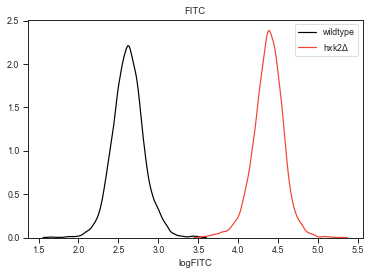

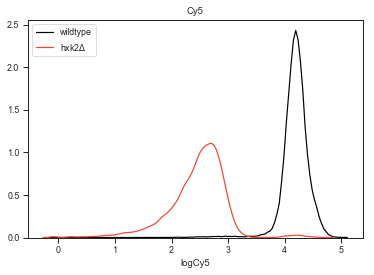

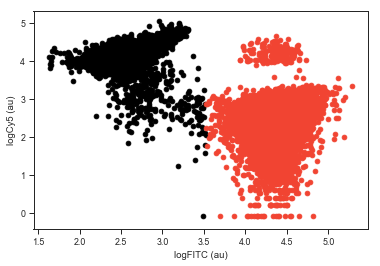

In [175]:
[r_g0_plus_0511, wt_g0_plus_0511, hxk2_g0_plus_0511] = calculate_states(g0_gated_0511_pos, -1)

Ratio hxk2/wt: 0.623976504094


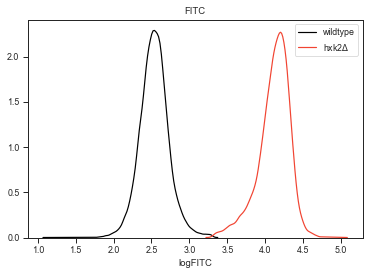

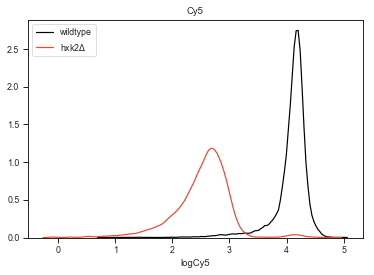

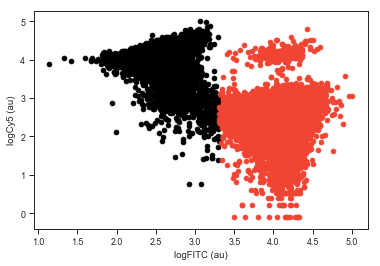

In [176]:
[r_g0_t0_0511, wt_g0_t0_0511, hxk2_g0_t0_0511] = calculate_states(g0_gated_0511_pos, 0)

Ratio hxk2/wt: 0.652184179457


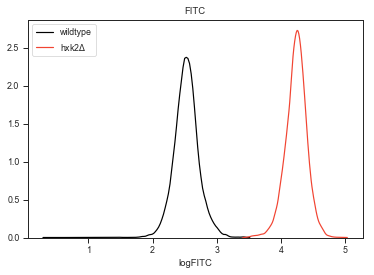

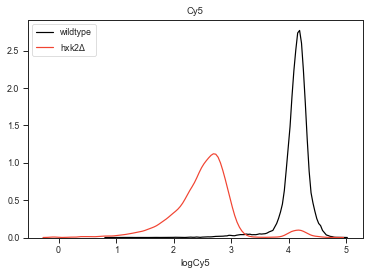

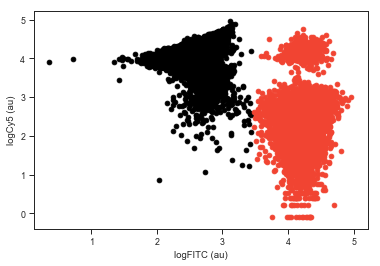

In [177]:
[r_g0_t2_0511, wt_g0_t2_0511, hxk2_g0_t2_0511] = calculate_states(g0_gated_0511_pos, 2)

Ratio hxk2/wt: 0.810337640684


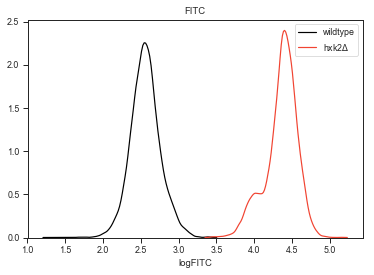

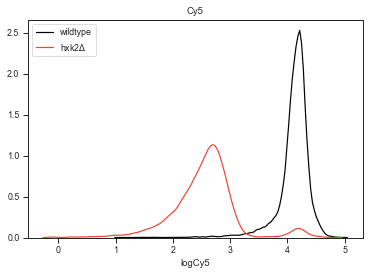

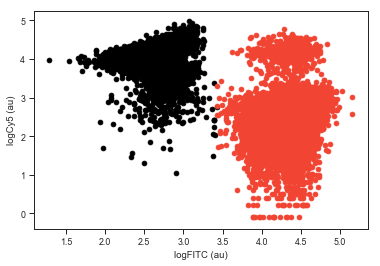

In [178]:
[r_g0_t4_0511, wt_g0_t4_0511, hxk2_g0_t4_0511] = calculate_states(g0_gated_0511_pos, 4)

Ratio hxk2/wt: 1.12301286904


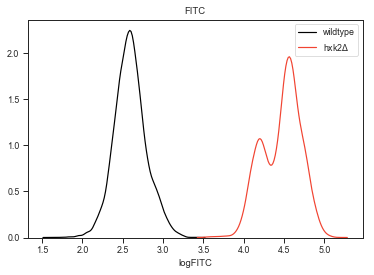

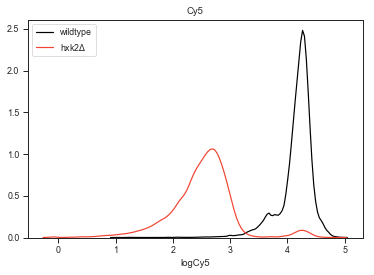

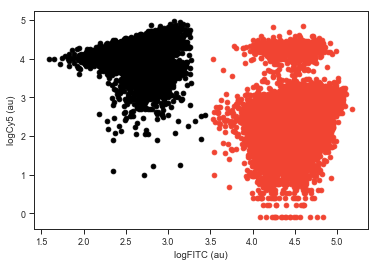

In [179]:
[r_g0_t6_0511, wt_g0_t6_0511, hxk2_g0_t6_0511] = calculate_states(g0_gated_0511_pos, 6)

Ratio hxk2/wt: 1.65055189527


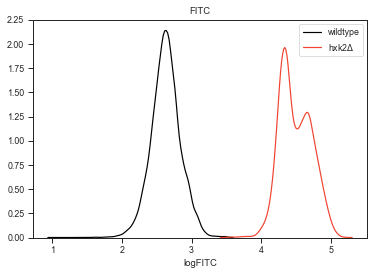

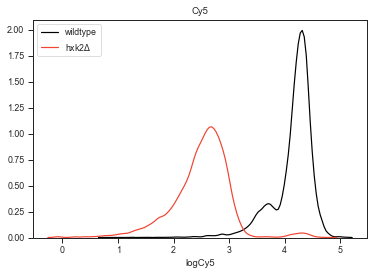

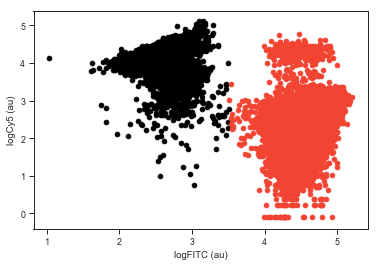

In [180]:
[r_g0_t8_0511, wt_g0_t8_0511, hxk2_g0_t8_0511] = calculate_states(g0_gated_0511_pos, 8)

Ratio hxk2/wt: 2.2133774976


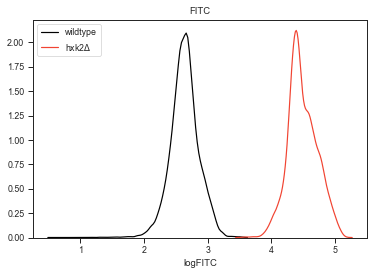

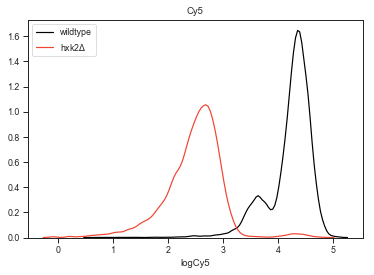

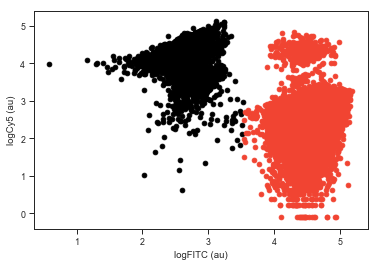

In [181]:
[r_g0_t10_0511, wt_g0_t10_0511, hxk2_g0_t10_0511] = calculate_states(g0_gated_0511_pos, 10)

Ratio hxk2/wt: 2.5196969697


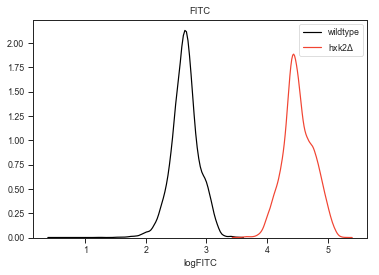

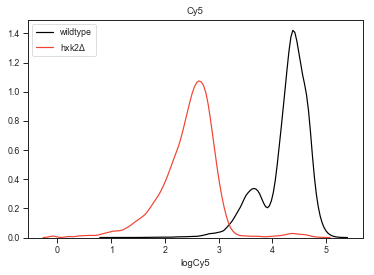

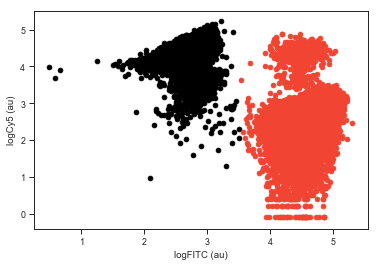

In [182]:
[r_g0_t12_0511, wt_g0_t12_0511, hxk2_g0_t12_0511] = calculate_states(g0_gated_0511_pos, 12)

Ratio hxk2/wt: 2.8392335998


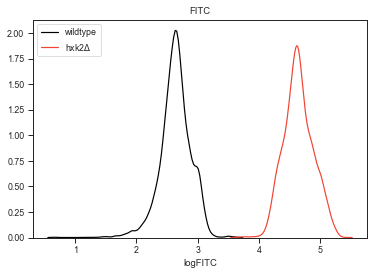

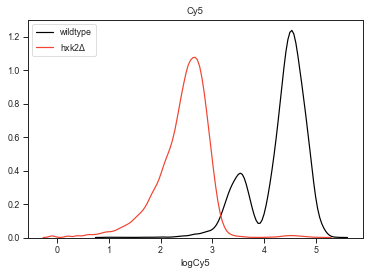

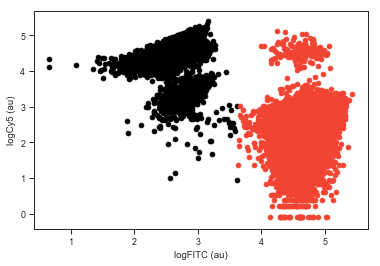

In [183]:
[r_g0_t24_0511, wt_g0_t24_0511, hxk2_g0_t24_0511] = calculate_states(g0_gated_0511_pos, 24)

In [184]:
r0s_0511 = [r_g0_plus_0511, r_g0_t0_0511, r_g0_t2_0511, r_g0_t4_0511, r_g0_t6_0511,
            r_g0_t8_0511, r_g0_t10_0511, r_g0_t12_0511, r_g0_t24_0511]

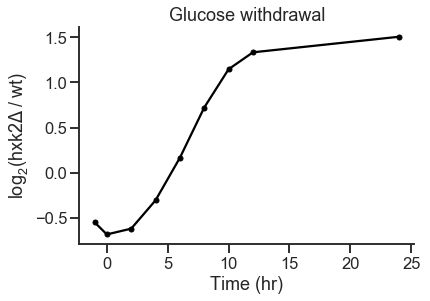

In [185]:
sns.set_context('talk')
sns.set_style('ticks')

f, ax = plt.subplots()

plt.plot([-1, 0, 2, 4, 6, 8, 10, 12, 24], np.log2(r0s_0511), color = 'black',
         marker = '.', markersize = 10)

ax.set_xlabel('Time (hr)')
ax.set_ylabel('$\mathregular{log_{2}(hxk2\Delta \; / \; wt)}$')
ax.set_title('Glucose withdrawal')

sns.despine()

Ratio hxk2/wt: 0.68189773426


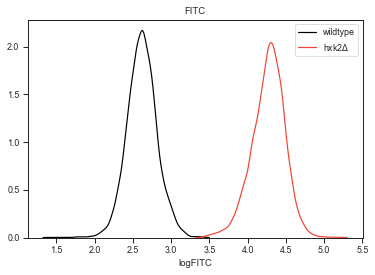

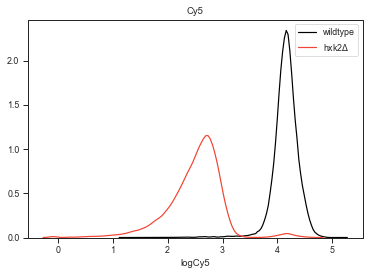

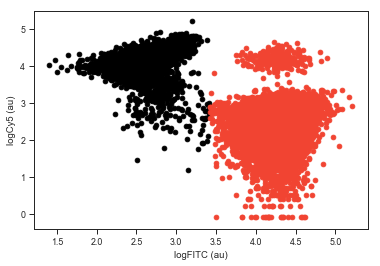

In [186]:
sns.set_context('paper')
sns.set_style('ticks')

[r_g2_t0_0511, wt_g2_t0_0511, hxk2_g2_t0_0511] = calculate_states(g2_gated_0511_pos, 0)

Ratio hxk2/wt: 0.58232949914


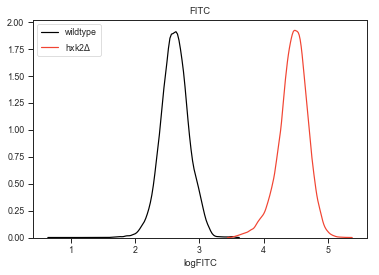

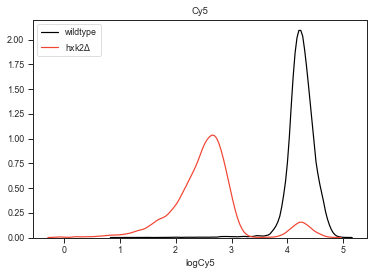

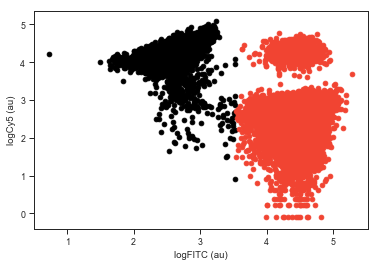

In [187]:
[r_g2_t2_0511, wt_g2_t2_0511, hxk2_g2_t2_0511] = calculate_states(g2_gated_0511_pos, 2)

Ratio hxk2/wt: 0.472585073633


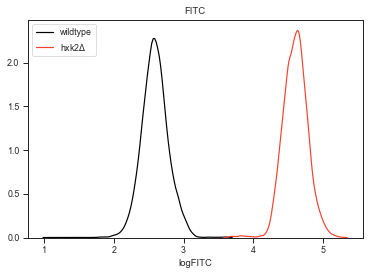

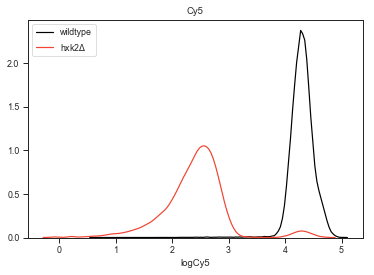

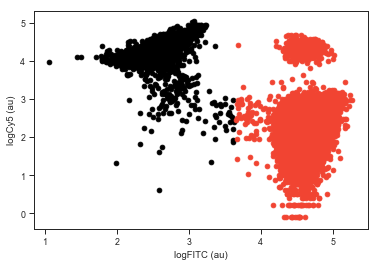

In [188]:
[r_g2_t4_0511, wt_g2_t4_0511, hxk2_g2_t4_0511] = calculate_states(g2_gated_0511_pos, 4)

Ratio hxk2/wt: 0.409691629956


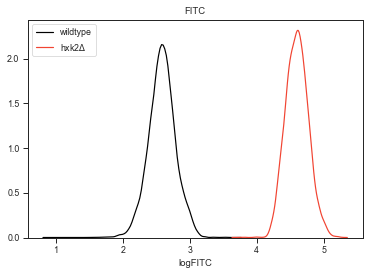

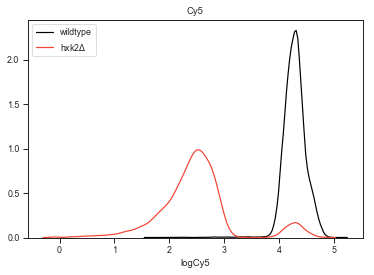

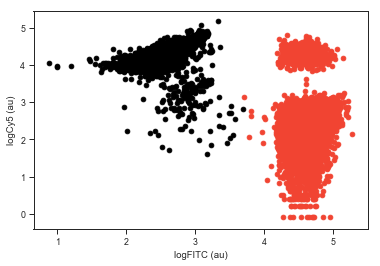

In [189]:
[r_g2_t6_0511, wt_g2_t6_0511, hxk2_g2_t6_0511] = calculate_states(g2_gated_0511_pos, 6)

Ratio hxk2/wt: 0.440810536981


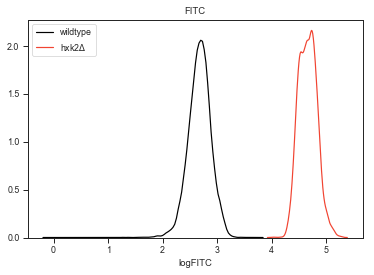

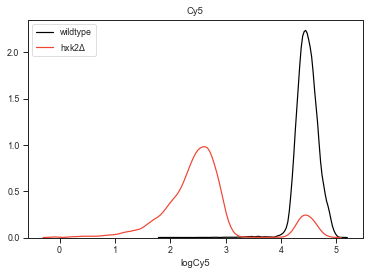

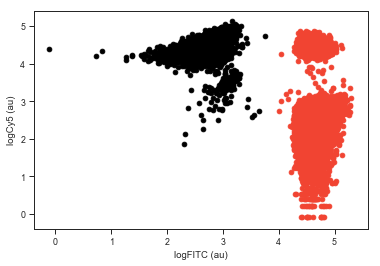

In [190]:
[r_g2_t8_0511, wt_g2_t8_0511, hxk2_g2_t8_0511] = calculate_states(g2_gated_0511_pos, 8)

Ratio hxk2/wt: 0.474688310602


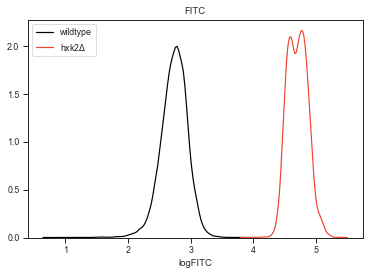

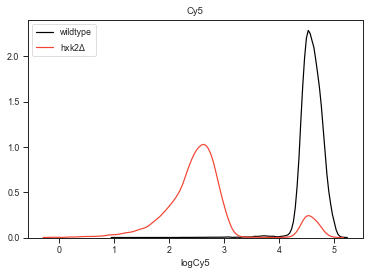

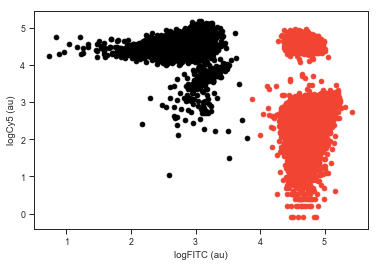

In [191]:
[r_g2_t10_0511, wt_g2_t10_0511, hxk2_g2_t10_0511] = calculate_states(g2_gated_0511_pos, 10)

Ratio hxk2/wt: 0.473190803428


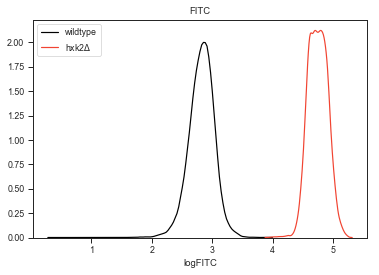

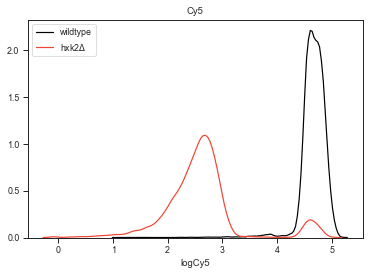

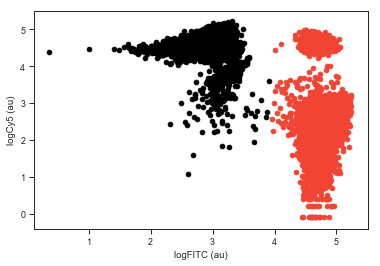

In [192]:
[r_g2_t12_0511, wt_g2_t12_0511, hxk2_g2_t12_0511] = calculate_states(g2_gated_0511_pos, 12)

Ratio hxk2/wt: 0.534183023197


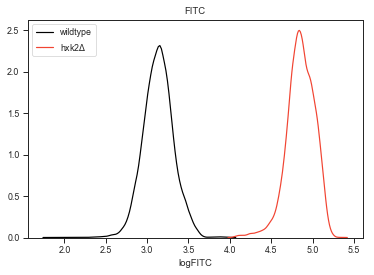

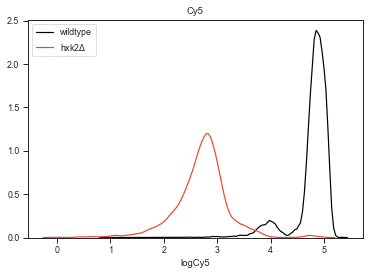

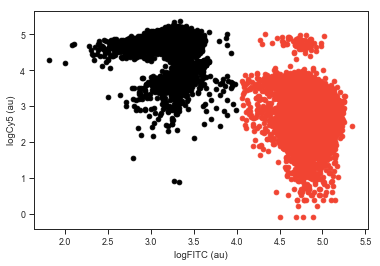

In [193]:
[r_g2_t24_0511, wt_g2_t24_0511, hxk2_g2_t24_0511] = calculate_states(g2_gated_0511_pos, 24)

In [194]:
r2s_0511 = [r_g2_t0_0511, r_g2_t2_0511, r_g2_t4_0511, r_g2_t6_0511,
            r_g2_t8_0511, r_g2_t10_0511, r_g2_t12_0511, r_g2_t24_0511]

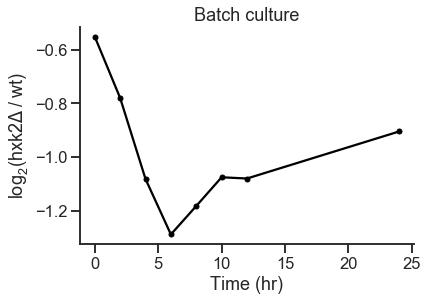

In [195]:
sns.set_context('talk')
sns.set_style('ticks')

f, ax = plt.subplots()

plt.plot([0, 2, 4, 6, 8, 10, 12, 24], np.log2(r2s_0511), color = 'black',
         marker = '.', markersize = 10)

ax.set_xlabel('Time (hr)')
ax.set_ylabel('$\mathregular{log_{2}(hxk2\Delta\; / \; wt)}$')
ax.set_title('Batch culture')

sns.despine()

In [196]:
growth_0511 = [1269900, 3225546, 8845608, 23712372, 36363582, 39722286, 43115058, 45659136]

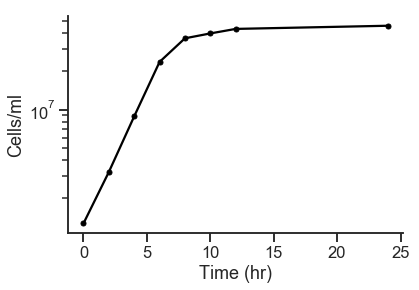

In [197]:
sns.set_context('talk')
sns.set_style('ticks')

f, ax = plt.subplots()

plt.plot([0, 2, 4, 6, 8, 10, 12, 24], growth_0511, color = 'black',
         marker = '.', markersize = 10)

ax.set_yscale('log')
ax.set_xlabel('Time (hr)')
ax.set_ylabel('Cells/ml')

sns.despine()

## Analysis of data from 05/15/2019

Ratio hxk2/wt: 0.794386219778


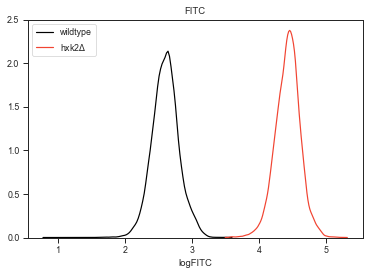

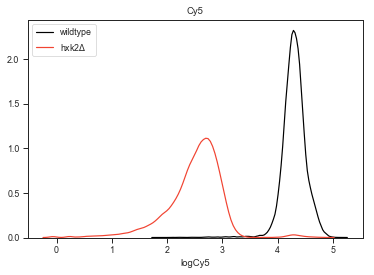

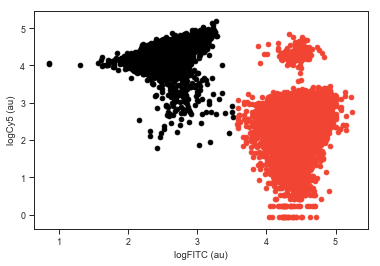

In [198]:
[r_g0_tplus_0515, wt_g0_tplus_0515, hxk2_g0_tplus_0515] = calculate_states(g0_gated_0515_pos, -1)

Ratio hxk2/wt: 0.686789805939


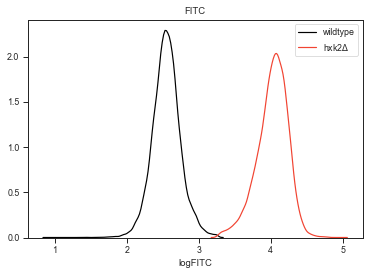

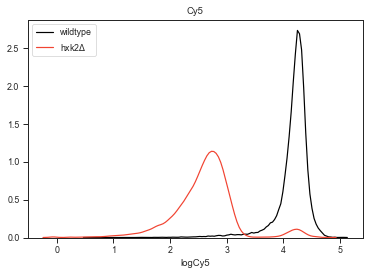

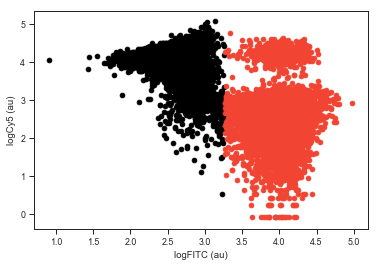

In [199]:
[r_g0_t0_0515, wt_g0_t0_0515, hxk2_g0_t0_0515] = calculate_states(g0_gated_0515_pos, 0)

Ratio hxk2/wt: 0.683957091776


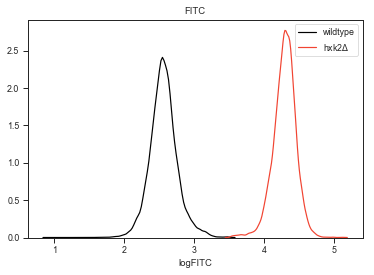

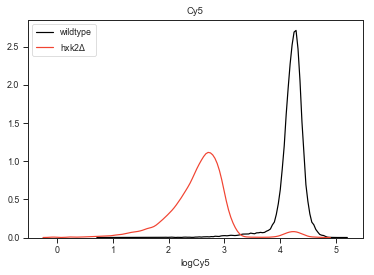

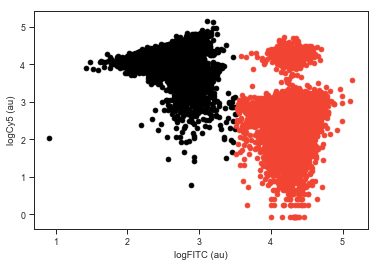

In [200]:
[r_g0_t2_0515, wt_g0_t2_0515, hxk2_g0_t2_0515] = calculate_states(g0_gated_0515_pos, 2)

Ratio hxk2/wt: 0.811111111111


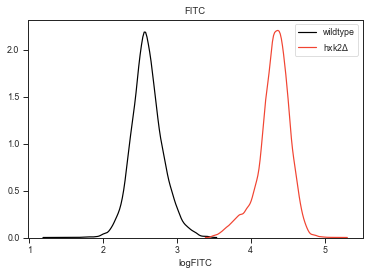

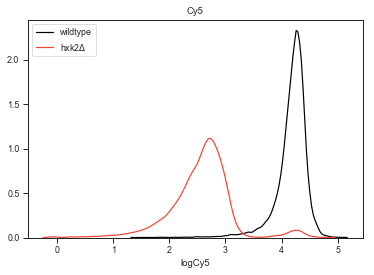

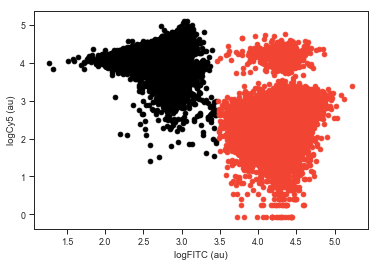

In [201]:
[r_g0_t4_0515, wt_g0_t4_0515, hxk2_g0_t4_0515] = calculate_states(g0_gated_0515_pos, 4)

Ratio hxk2/wt: 0.987921022067


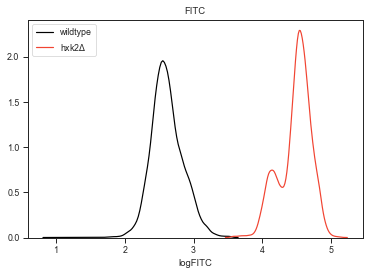

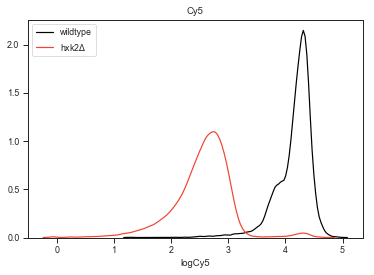

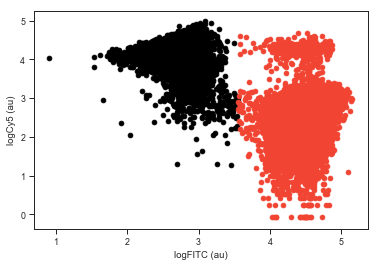

In [202]:
[r_g0_t6_0515, wt_g0_t6_0515, hxk2_g0_t6_0515] = calculate_states(g0_gated_0515_pos, 6)

Ratio hxk2/wt: 1.50569600499


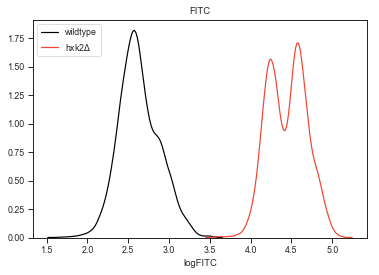

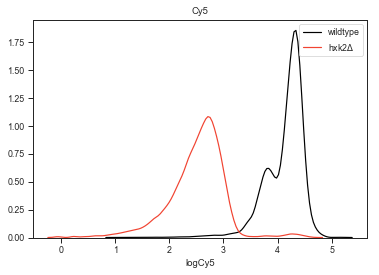

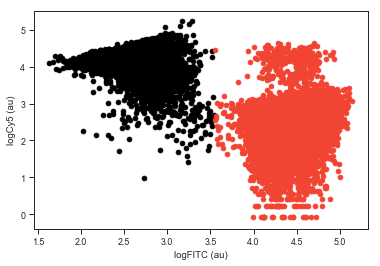

In [203]:
[r_g0_t8_0515, wt_g0_t8_0515, hxk2_g0_t8_0515] = calculate_states(g0_gated_0515_pos, 8)

Ratio hxk2/wt: 2.13944184231


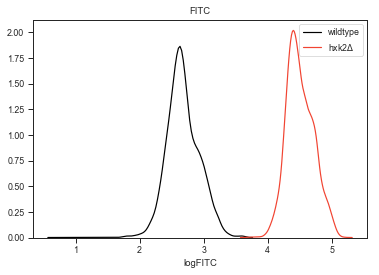

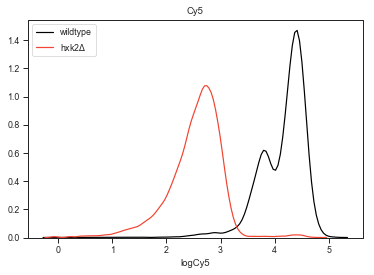

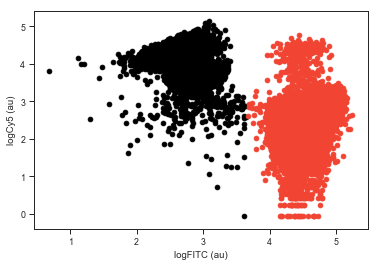

In [204]:
[r_g0_t10_0515, wt_g0_t10_0515, hxk2_g0_t10_0515] = calculate_states(g0_gated_0515_pos, 10)

Ratio hxk2/wt: 2.93091537133


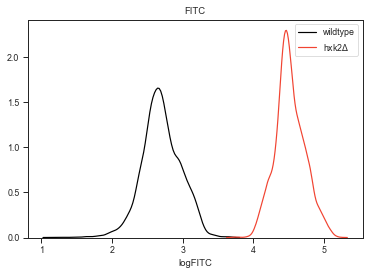

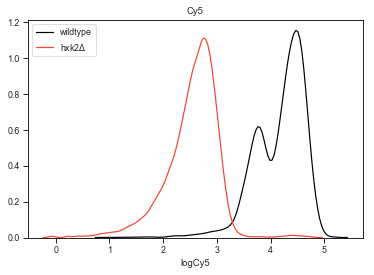

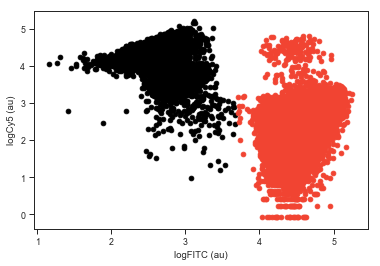

In [205]:
[r_g0_t12_0515, wt_g0_t12_0515, hxk2_g0_t12_0515] = calculate_states(g0_gated_0515_pos, 12)

Ratio hxk2/wt: 3.7147777082


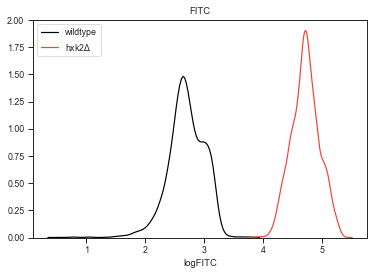

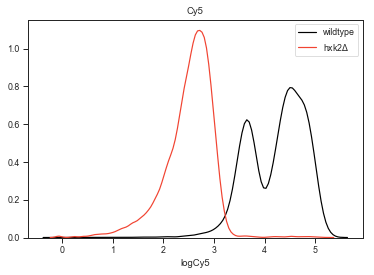

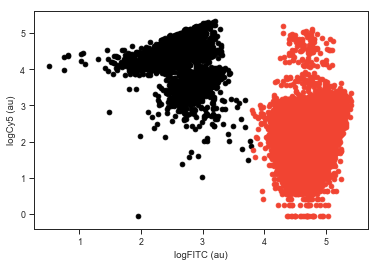

In [206]:
[r_g0_t24_0515, wt_g0_t24_0515, hxk2_g0_t24_0515] = calculate_states(g0_gated_0515_pos, 24)

In [207]:
r0s_0515 = [r_g0_tplus_0515, r_g0_t0_0515, r_g0_t2_0515, r_g0_t4_0515, r_g0_t6_0515,
            r_g0_t8_0515, r_g0_t10_0515, r_g0_t12_0515, r_g0_t24_0515]

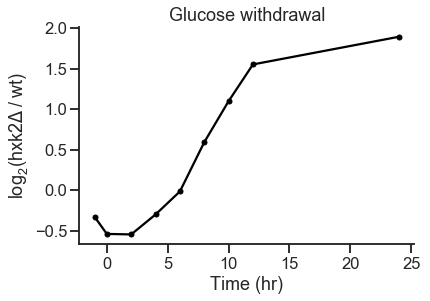

In [208]:
sns.set_context('talk')
sns.set_style('ticks')

f, ax = plt.subplots()

plt.plot([-1, 0, 2, 4, 6, 8, 10, 12, 24], np.log2(r0s_0515), color = 'black',
         marker = '.', markersize = 10)

ax.set_xlabel('Time (hr)')
ax.set_ylabel('$\mathregular{log_{2}(hxk2\Delta \; / \; wt)}$')
ax.set_title('Glucose withdrawal')

sns.despine()

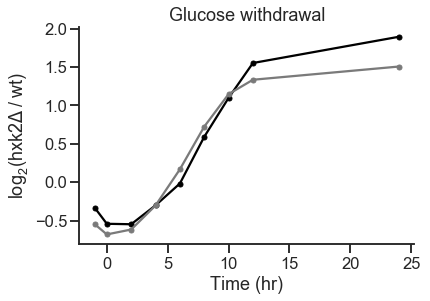

In [209]:
sns.set_context('talk')
sns.set_style('ticks')

f, ax = plt.subplots()

plt.plot([-1, 0, 2, 4, 6, 8, 10, 12, 24], np.log2(r0s_0515), color = 'black',
         marker = '.', markersize = 10)
plt.plot([-1, 0, 2, 4, 6, 8, 10, 12, 24], np.log2(r0s_0511), color = grays[5],
         marker = '.', markersize = 10)



ax.set_xlabel('Time (hr)')
ax.set_ylabel('$\mathregular{log_{2}(hxk2\Delta \; / \; wt)}$')
ax.set_title('Glucose withdrawal')

sns.despine()

Ratio hxk2/wt: 0.765131308986


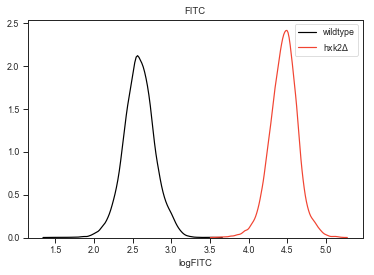

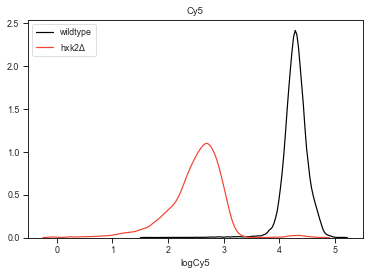

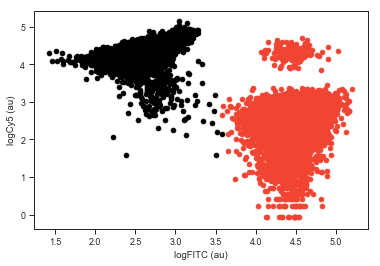

In [210]:
[r_g2_t0_0515, wt_g2_t0_0515, hxk2_g2_t0_0515] = calculate_states(g2_gated_0515_pos, 0)

Ratio hxk2/wt: 0.634500587544


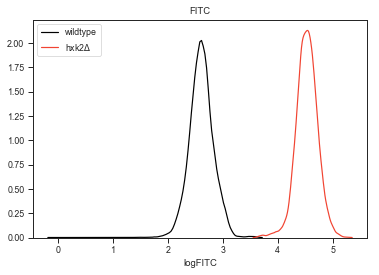

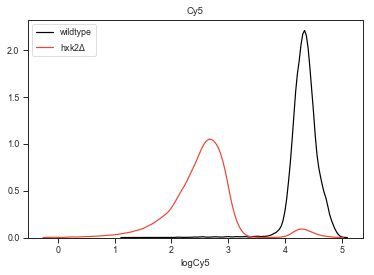

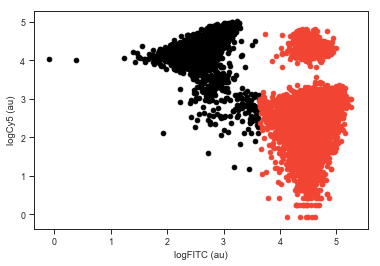

In [211]:
[r_g2_t2_0515, wt_g2_t2_0515, hxk2_g2_t2_0515] = calculate_states(g2_gated_0515_pos, 2)

Ratio hxk2/wt: 0.557520941009


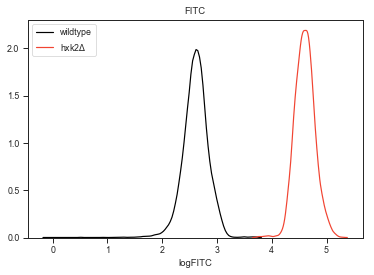

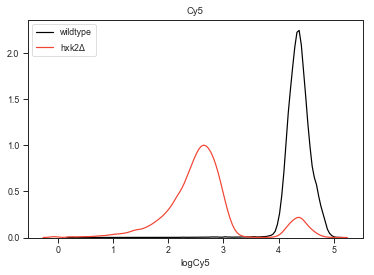

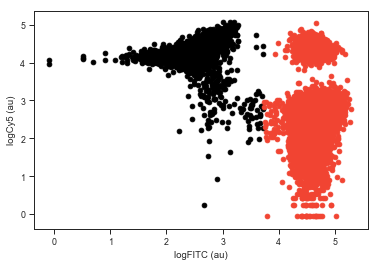

In [212]:
[r_g2_t4_0515, wt_g2_t4_0515, hxk2_g2_t4_0515] = calculate_states(g2_gated_0515_pos, 4)

Ratio hxk2/wt: 0.473603130985


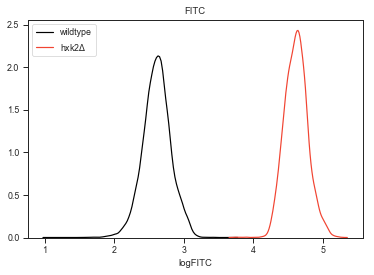

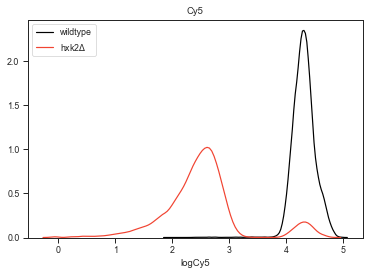

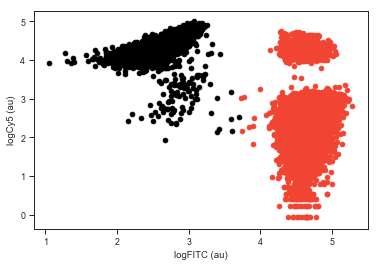

In [213]:
[r_g2_t6_0515, wt_g2_t6_0515, hxk2_g2_t6_0515] = calculate_states(g2_gated_0515_pos, 6)

Ratio hxk2/wt: 0.508009153318


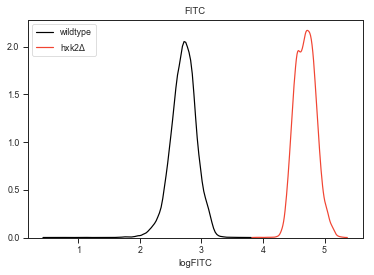

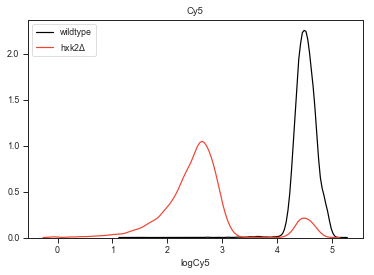

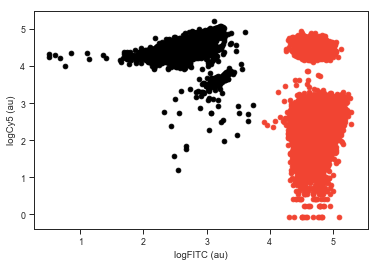

In [214]:
[r_g2_t8_0515, wt_g2_t8_0515, hxk2_g2_t8_0515] = calculate_states(g2_gated_0515_pos, 8)

Ratio hxk2/wt: 0.541979702122


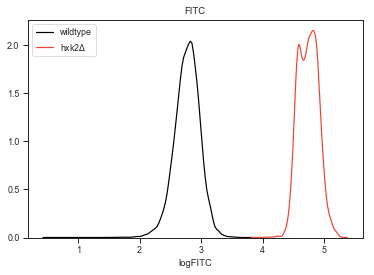

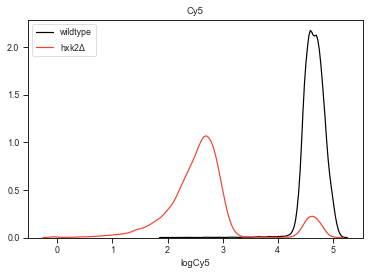

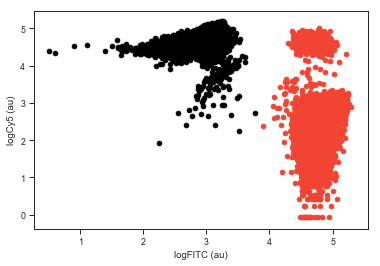

In [215]:
[r_g2_t10_0515, wt_g2_t10_0515, hxk2_g2_t10_0515] = calculate_states(g2_gated_0515_pos, 10)

Ratio hxk2/wt: 0.559012875536


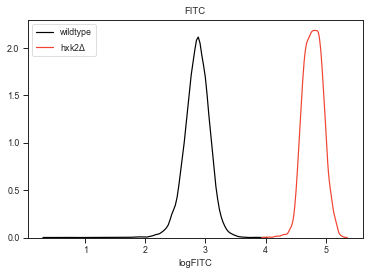

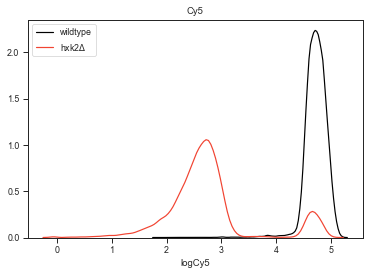

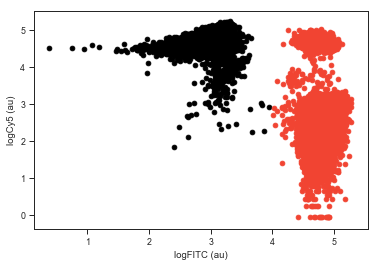

In [216]:
[r_g2_t12_0515, wt_g2_t12_0515, hxk2_g2_t12_0515] = calculate_states(g2_gated_0515_pos, 12)

Ratio hxk2/wt: 0.599486246388


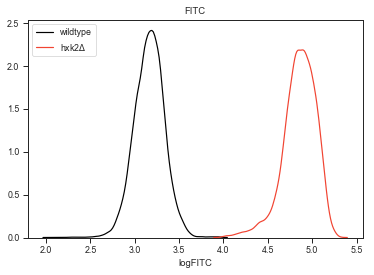

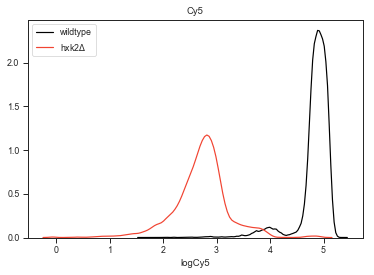

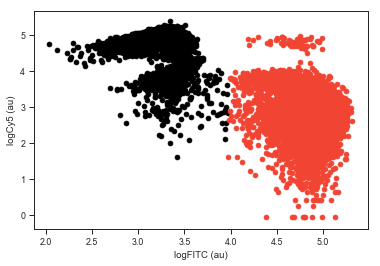

In [217]:
[r_g2_t24_0515, wt_g2_t24_0515, hxk2_g2_t24_0515] = calculate_states(g2_gated_0515_pos, 24)

In [218]:
r2s_0515 = [r_g2_t0_0515, r_g2_t2_0515, r_g2_t4_0515, r_g2_t6_0515,
            r_g2_t8_0515, r_g2_t10_0515, r_g2_t12_0515, r_g2_t24_0515]

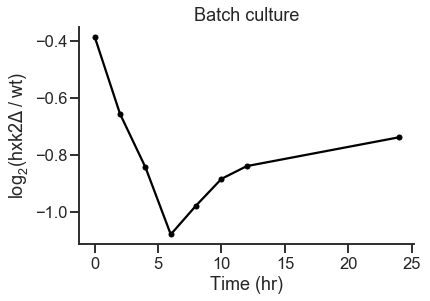

In [219]:
sns.set_context('talk')
sns.set_style('ticks')

f, ax = plt.subplots()

plt.plot([0, 2, 4, 6, 8, 10, 12, 24], np.log2(r2s_0515), color = 'black',
         marker = '.', markersize = 10)

ax.set_xlabel('Time (hr)')
ax.set_ylabel('$\mathregular{log_{2}(hxk2\Delta\; / \; wt)}$')
ax.set_title('Batch culture')

sns.despine()

In [220]:
growth_0515 = [1203600.000000, 3511350.000000, 9160776.000000, 2.744776e+007, 
               4.043962e+007, 4.379041e+007, 4.545673e+007, 4.203290e+007]

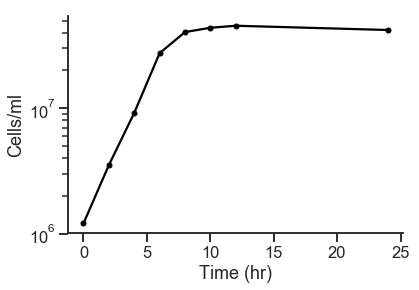

In [221]:
sns.set_context('talk')
sns.set_style('ticks')

f, ax = plt.subplots()

plt.plot([0, 2, 4, 6, 8, 10, 12, 24], growth_0515, color = 'black',
         marker = '.', markersize = 10)

ax.set_yscale('log')
ax.set_xlabel('Time (hr)')
ax.set_ylabel('Cells/ml')

sns.despine()

## Analysis of data from 05/17/2019

Ratio hxk2/wt: 0.779421654338


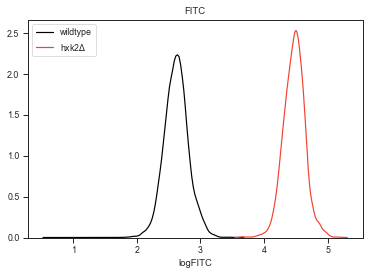

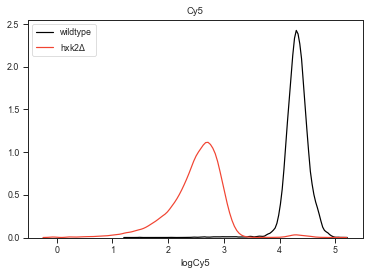

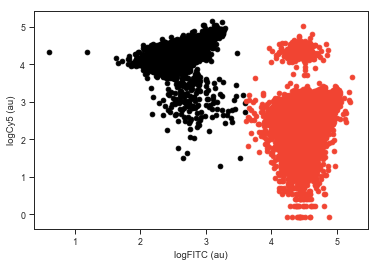

In [222]:
[r_g0_tplus_0517, wt_g0_tplus_0517, hxk2_g0_tplus_0517] = calculate_states(g0_gated_0517_pos, -1)

Ratio hxk2/wt: 0.735677712298


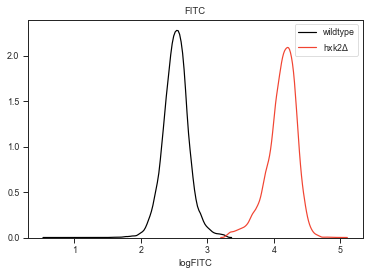

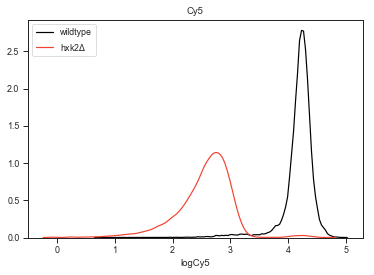

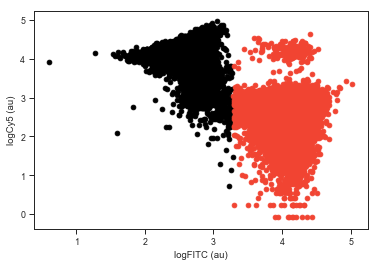

In [223]:
[r_g0_t0_0517, wt_g0_t0_0517, hxk2_g0_t0_0517] = calculate_states(g0_gated_0517_pos, 0)

Ratio hxk2/wt: 0.738619458494


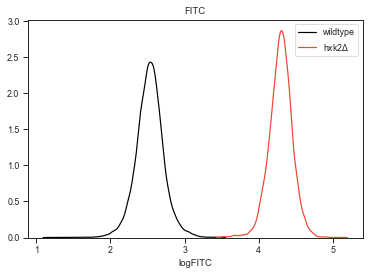

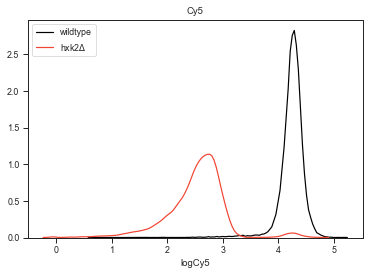

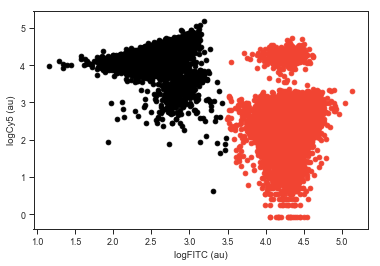

In [224]:
[r_g0_t2_0517, wt_g0_t2_0517, hxk2_g0_t2_0517] = calculate_states(g0_gated_0517_pos, 2)

Ratio hxk2/wt: 1.02460508544


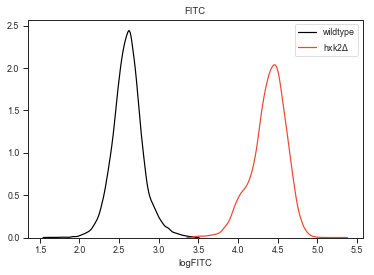

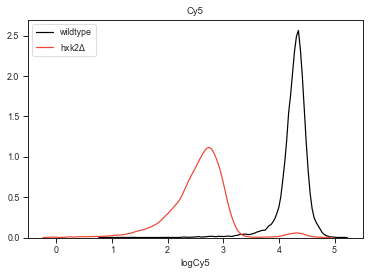

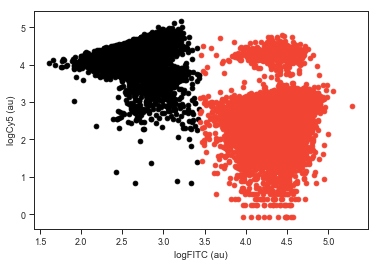

In [225]:
[r_g0_t4_0517, wt_g0_t4_0517, hxk2_g0_t4_0517] = calculate_states(g0_gated_0517_pos, 4)

Ratio hxk2/wt: 1.62143761875


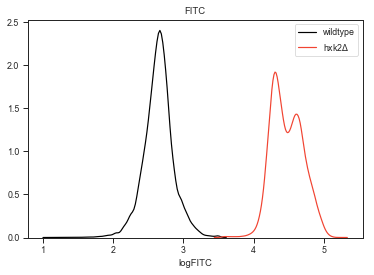

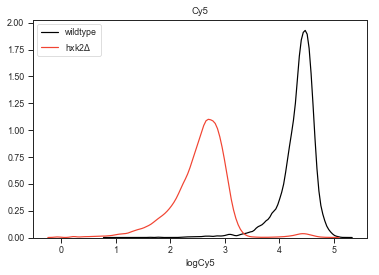

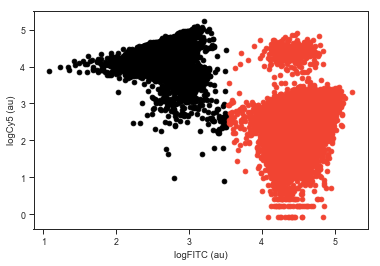

In [226]:
[r_g0_t6_0517, wt_g0_t6_0517, hxk2_g0_t6_0517] = calculate_states(g0_gated_0517_pos, 6)

Ratio hxk2/wt: 2.20950155763


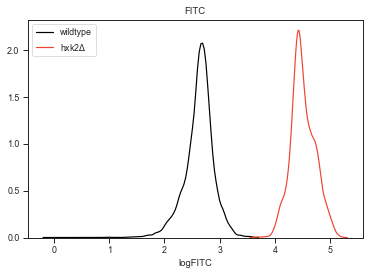

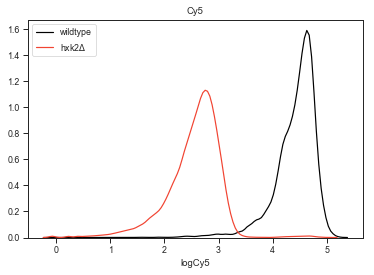

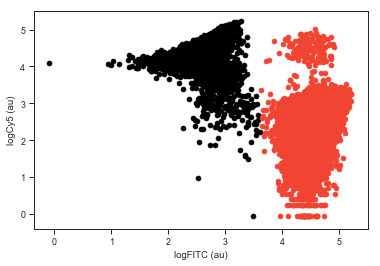

In [227]:
[r_g0_t8_0517, wt_g0_t8_0517, hxk2_g0_t8_0517] = calculate_states(g0_gated_0517_pos, 8)

Ratio hxk2/wt: 2.53853016616


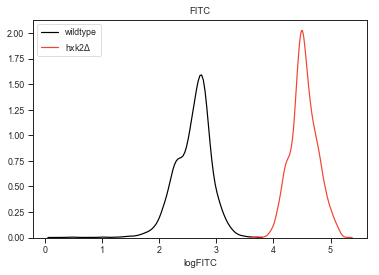

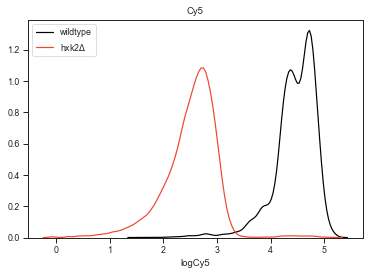

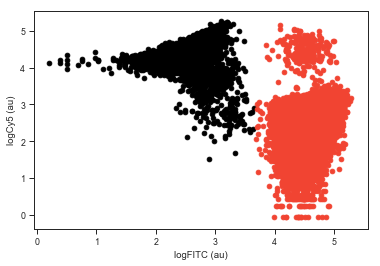

In [228]:
[r_g0_t10_0517, wt_g0_t10_0517, hxk2_g0_t10_0517] = calculate_states(g0_gated_0517_pos, 10)

Ratio hxk2/wt: 2.58395262425


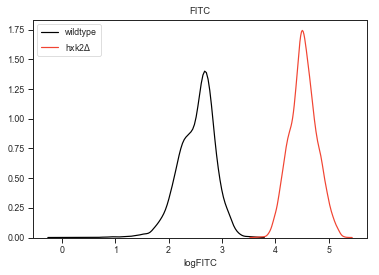

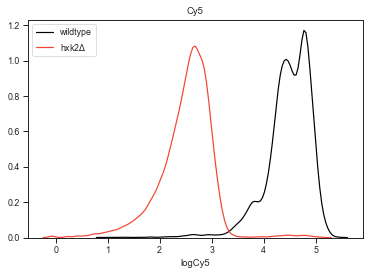

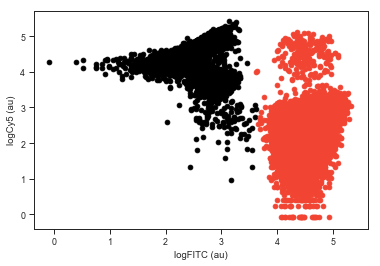

In [229]:
[r_g0_t12_0517, wt_g0_t12_0517, hxk2_g0_t12_0517] = calculate_states(g0_gated_0517_pos, 12)

Ratio hxk2/wt: 2.91698449021


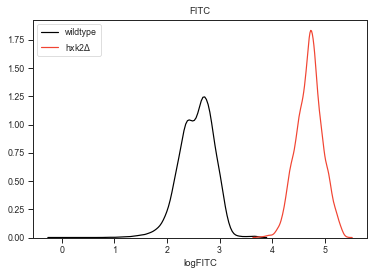

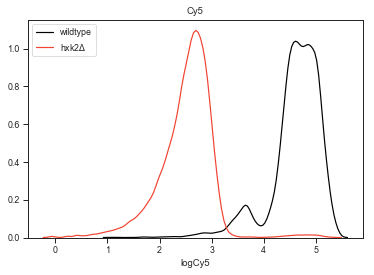

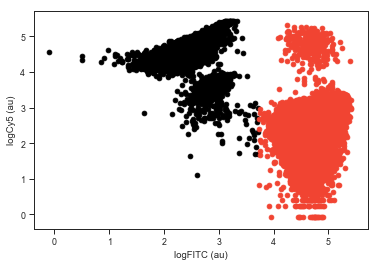

In [230]:
[r_g0_t24_0517, wt_g0_t24_0517, hxk2_g0_t24_0517] = calculate_states(g0_gated_0517_pos, 24)

In [231]:
r0s_0517 = [r_g0_tplus_0517, r_g0_t0_0517, r_g0_t2_0517, r_g0_t4_0517, r_g0_t6_0517,
            r_g0_t8_0517, r_g0_t10_0517, r_g0_t12_0517, r_g0_t24_0517]

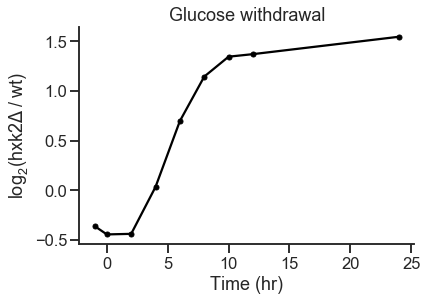

In [232]:
sns.set_context('talk')
sns.set_style('ticks')

f, ax = plt.subplots()

plt.plot([-1, 0, 2, 4, 6, 8, 10, 12, 24], np.log2(r0s_0517), color = 'black',
         marker = '.', markersize = 10)


ax.set_xlabel('Time (hr)')
ax.set_ylabel('$\mathregular{log_{2}(hxk2\Delta \; / \; wt)}$')
ax.set_title('Glucose withdrawal')

sns.despine()

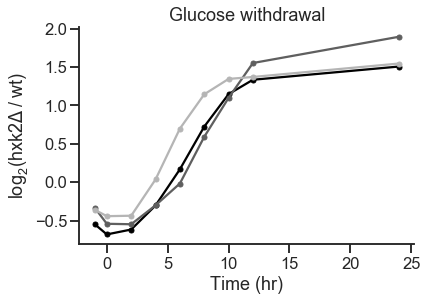

In [233]:
sns.set_context('talk')
sns.set_style('ticks')

f, ax = plt.subplots()

plt.plot([-1, 0, 2, 4, 6, 8, 10, 12, 24], np.log2(r0s_0511), color = 'black',
         marker = '.', markersize = 10)
plt.plot([-1, 0, 2, 4, 6, 8, 10, 12, 24], np.log2(r0s_0515), color = grays[6],
         marker = '.', markersize = 10)
plt.plot([-1, 0, 2, 4, 6, 8, 10, 12, 24], np.log2(r0s_0517), color = grays[3],
         marker = '.', markersize = 10)




ax.set_xlabel('Time (hr)')
ax.set_ylabel('$\mathregular{log_{2}(hxk2\Delta \; / \; wt)}$')
ax.set_title('Glucose withdrawal')

sns.despine()

Ratio hxk2/wt: 0.788819875776


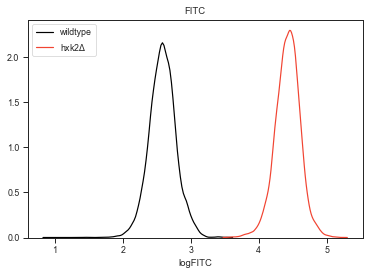

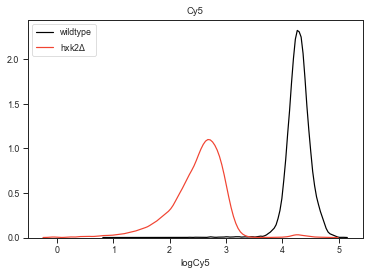

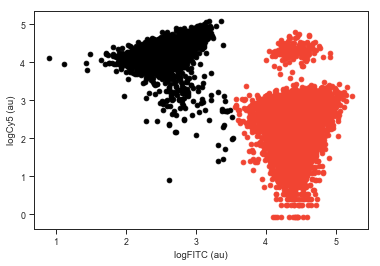

In [234]:
[r_g2_t0_0517, wt_g2_t0_0517, hxk2_g2_t0_0517] = calculate_states(g2_gated_0517_pos, 0)

Ratio hxk2/wt: 0.668699577411


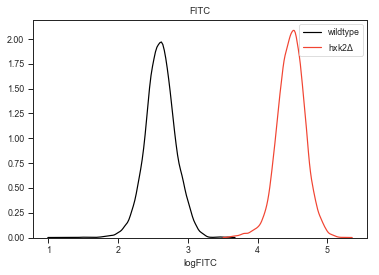

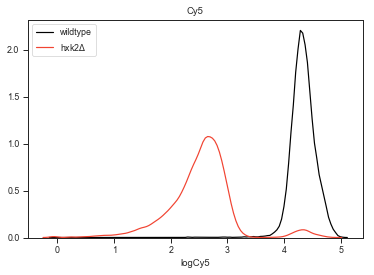

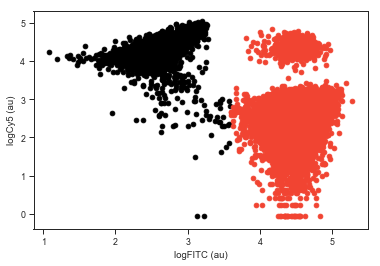

In [235]:
[r_g2_t2_0517, wt_g2_t2_0517, hxk2_g2_t2_0517] = calculate_states(g2_gated_0517_pos, 2)

Ratio hxk2/wt: 0.591132556446


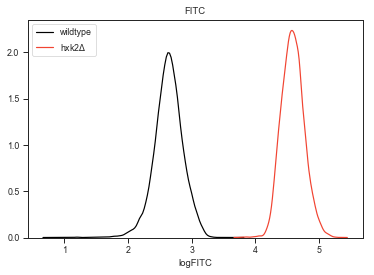

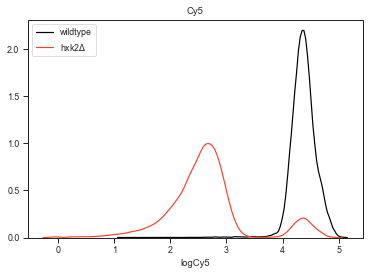

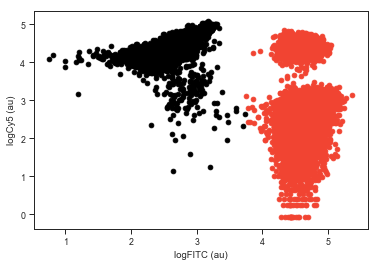

In [236]:
[r_g2_t4_0517, wt_g2_t4_0517, hxk2_g2_t4_0517] = calculate_states(g2_gated_0517_pos, 4)

Ratio hxk2/wt: 0.473701689568


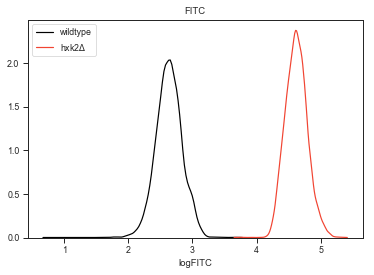

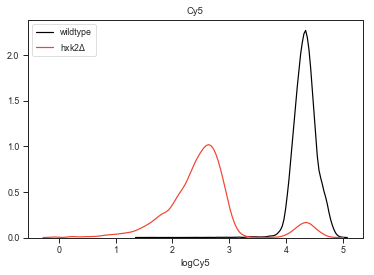

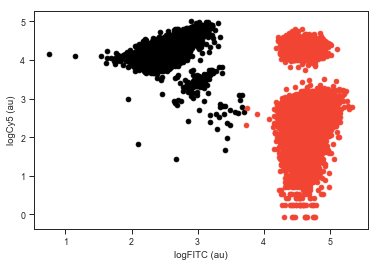

In [237]:
[r_g2_t6_0517, wt_g2_t6_0517, hxk2_g2_t6_0517] = calculate_states(g2_gated_0517_pos, 6)

Ratio hxk2/wt: 0.516265549523


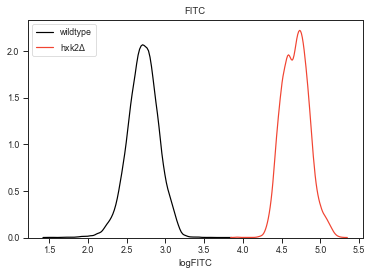

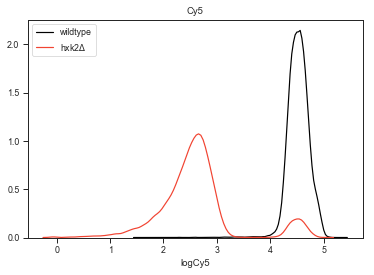

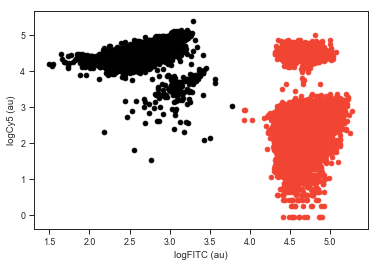

In [238]:
[r_g2_t8_0517, wt_g2_t8_0517, hxk2_g2_t8_0517] = calculate_states(g2_gated_0517_pos, 8)

Ratio hxk2/wt: 0.542673815593


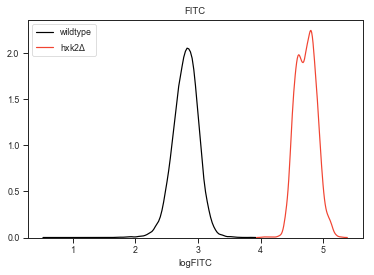

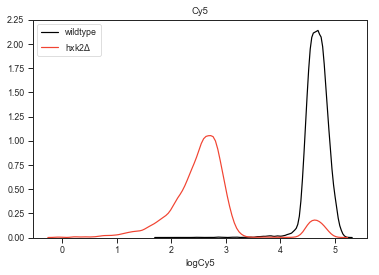

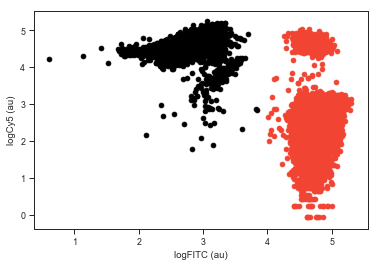

In [239]:
[r_g2_t10_0517, wt_g2_t10_0517, hxk2_g2_t10_0517] = calculate_states(g2_gated_0517_pos, 10)

Ratio hxk2/wt: 0.556212750587


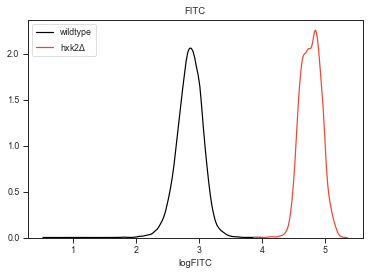

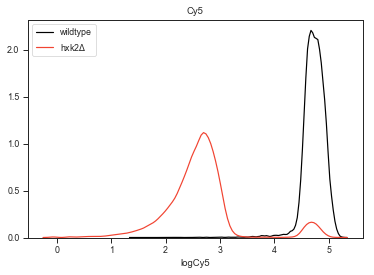

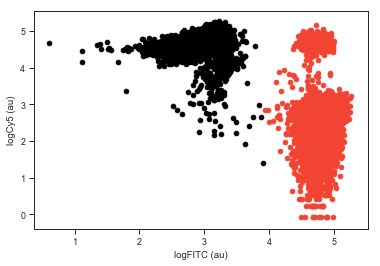

In [240]:
[r_g2_t12_0517, wt_g2_t12_0517, hxk2_g2_t12_0517] = calculate_states(g2_gated_0517_pos, 12)

Ratio hxk2/wt: 0.602724736007


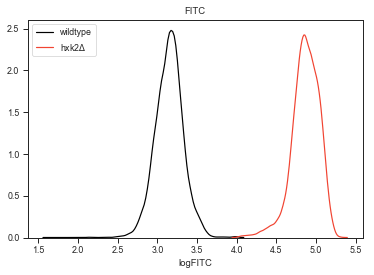

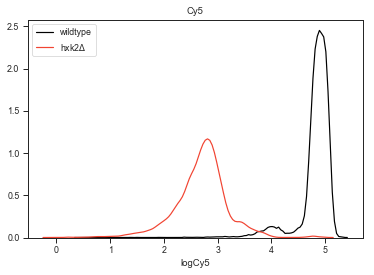

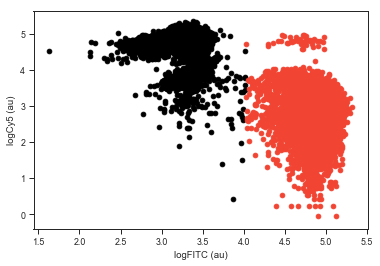

In [241]:
[r_g2_t24_0517, wt_g2_t24_0517, hxk2_g2_t24_0517] = calculate_states(g2_gated_0517_pos, 24)

In [242]:
r2s_0517 = [r_g2_t0_0517, r_g2_t2_0517, r_g2_t4_0517, r_g2_t6_0517,
            r_g2_t8_0517, r_g2_t10_0517, r_g2_t12_0517, r_g2_t24_0517]

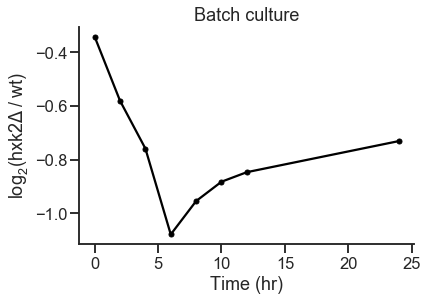

In [243]:
sns.set_context('talk')
sns.set_style('ticks')

f, ax = plt.subplots()

plt.plot([0, 2, 4, 6, 8, 10, 12, 24], np.log2(r2s_0517), color = 'black',
         marker = '.', markersize = 10)

ax.set_xlabel('Time (hr)')
ax.set_ylabel('$\mathregular{log_{2}(hxk2\Delta\; / \; wt)}$')
ax.set_title('Batch culture')

sns.despine()

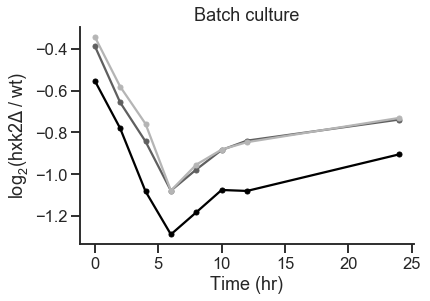

In [244]:
sns.set_context('talk')
sns.set_style('ticks')

f, ax = plt.subplots()

plt.plot([0, 2, 4, 6, 8, 10, 12, 24], np.log2(r2s_0511), color = 'black',
         marker = '.', markersize = 10)
plt.plot([0, 2, 4, 6, 8, 10, 12, 24], np.log2(r2s_0515), color = grays[6],
         marker = '.', markersize = 10)
plt.plot([0, 2, 4, 6, 8, 10, 12, 24], np.log2(r2s_0517), color = grays[3],
         marker = '.', markersize = 10)



ax.set_xlabel('Time (hr)')
ax.set_ylabel('$\mathregular{log_{2}(hxk2\Delta\; / \; wt)}$')
ax.set_title('Batch culture')

sns.despine()

In [245]:
growth_0517 = [1428102, 3892282, 9557952, 26542050, 38906658, 41175186, 43591008, 47752314]

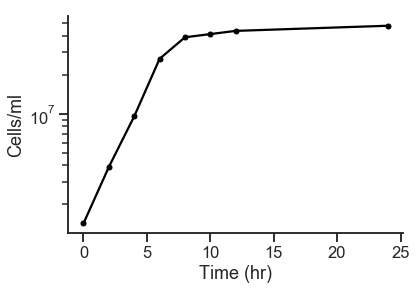

In [246]:
sns.set_context('talk')
sns.set_style('ticks')

f, ax = plt.subplots()

plt.plot([0, 2, 4, 6, 8, 10, 12, 24], growth_0517, color = 'black',
         marker = '.', markersize = 10)

ax.set_yscale('log')
ax.set_xlabel('Time (hr)')
ax.set_ylabel('Cells/ml')

sns.despine()

## In sum

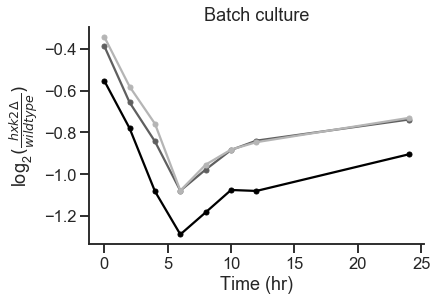

In [247]:
sns.set_context('talk')
sns.set_style('ticks')

f, ax = plt.subplots()

plt.plot([0, 2, 4, 6, 8, 10, 12, 24], np.log2(r2s_0511), color = 'black',
         marker = '.', markersize = 10)
plt.plot([0, 2, 4, 6, 8, 10, 12, 24], np.log2(r2s_0515), color = grays[6],
         marker = '.', markersize = 10)
plt.plot([0, 2, 4, 6, 8, 10, 12, 24], np.log2(r2s_0517), color = grays[3],
         marker = '.', markersize = 10)



ax.set_xlabel('Time (hr)')
ax.set_ylabel(r'$\mathregular{log_{2}}(\frac{hxk2\Delta}{wildtype})$')
ax.set_title('Batch culture')

sns.despine()

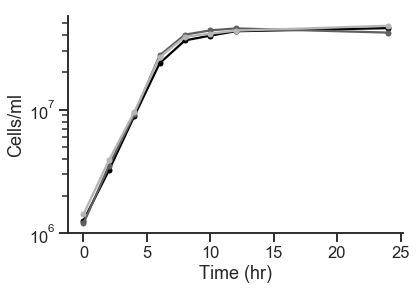

In [248]:
sns.set_context('talk')
sns.set_style('ticks')

f, ax = plt.subplots()

plt.plot([0, 2, 4, 6, 8, 10, 12, 24], growth_0511, color = 'black',
         marker = '.', markersize = 10)
plt.plot([0, 2, 4, 6, 8, 10, 12, 24], growth_0515, color = grays[6],
         marker = '.', markersize = 10)
plt.plot([0, 2, 4, 6, 8, 10, 12, 24], growth_0517, color = grays[3],
         marker = '.', markersize = 10)


ax.set_yscale('log')
ax.set_xlabel('Time (hr)')
ax.set_ylabel('Cells/ml')

sns.despine()

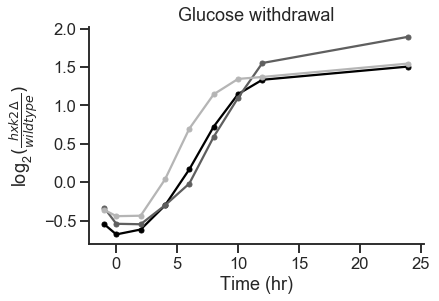

In [249]:
sns.set_context('talk')
sns.set_style('ticks')

f, ax = plt.subplots()

plt.plot([-1, 0, 2, 4, 6, 8, 10, 12, 24], np.log2(r0s_0511), color = 'black',
         marker = '.', markersize = 10)
plt.plot([-1, 0, 2, 4, 6, 8, 10, 12, 24], np.log2(r0s_0515), color = grays[6],
         marker = '.', markersize = 10)
plt.plot([-1, 0, 2, 4, 6, 8, 10, 12, 24], np.log2(r0s_0517), color = grays[3],
         marker = '.', markersize = 10)



ax.set_xlabel('Time (hr)')
ax.set_ylabel(r'$\mathregular{log_{2}}(\frac{hxk2\Delta}{wildtype})$')
ax.set_title('Glucose withdrawal')

sns.despine()

## Summary data

In [250]:
[np.log2(x) for x in r2s_0511[:4]]

[-0.5523727036409707,
 -0.7800923914771382,
 -1.0813540316676937,
 -1.2873896761828836]

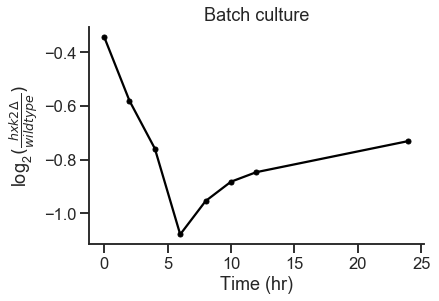

In [251]:
sns.set_context('talk')
sns.set_style('ticks')

f, ax = plt.subplots()

plt.plot([0, 2, 4, 6, 8, 10, 12, 24], np.log2(r2s_0517), color = 'black',
         marker = '.', markersize = 10)


ax.set_xlabel('Time (hr)')
ax.set_ylabel(r'$\mathregular{log_{2}}(\frac{hxk2\Delta}{wildtype})$')
ax.set_title('Batch culture')

sns.despine()

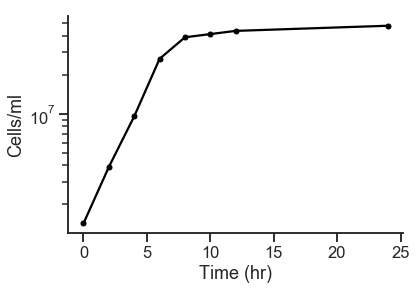

In [252]:
sns.set_context('talk')
sns.set_style('ticks')

f, ax = plt.subplots()

plt.plot([0, 2, 4, 6, 8, 10, 12, 24], growth_0517, color = 'black',
         marker = '.', markersize = 10)


ax.set_yscale('log')
ax.set_xlabel('Time (hr)')
ax.set_ylabel('Cells/ml')

sns.despine()

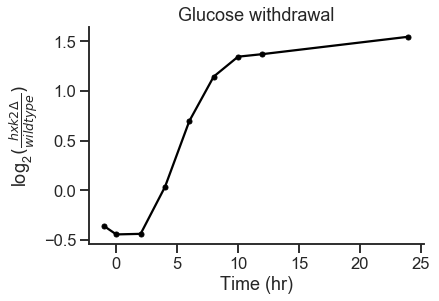

In [253]:
sns.set_context('talk')
sns.set_style('ticks')

f, ax = plt.subplots()

plt.plot([-1, 0, 2, 4, 6, 8, 10, 12, 24], np.log2(r0s_0517), color = 'black',
         marker = '.', markersize = 10)



ax.set_xlabel('Time (hr)')
ax.set_ylabel(r'$\mathregular{log_{2}}(\frac{hxk2\Delta}{wildtype})$')
ax.set_title('Glucose withdrawal')

sns.despine()

plt.savefig('hxk2_fitness_withdrawal.eps', dpi = 300, transparent = True, bbox_inches = 'tight')

## Relative fitness (doublings/hr)

In [254]:
times_0516 = [0.000000, 1.900000, 4.016667, 6.183333, 8.066667, 10.216670, 12.033330, 24.450000]
growths_0516 = [1428102.000000, 3892282.000000, 9557952.000000, 2.654205e+007, 
                3.890666e+007, 4.117518e+007, 4.359101e+007, 4.775231e+007]

In [255]:
times_0514 = [0.000000, 2.066667, 4.050000, 6.050000, 8.066667, 10.083330, 12.100000, 24.333330]
growths_0514 = [1203600.000000, 3511350.000000, 9160776.000000, 2.744776e+007, 4.043962e+007, 4.379041e+007,
                4.545673e+007, 4.203290e+007]

In [256]:
times_0510 = [0.000000, 2.083333, 4.000000, 6.083333, 8.833333, 10.083330, 12.166670, 24.350000]
growths_0510 = [1269900.000000, 3225546.000000, 8845608.000000, 2.371237e+007, 3.636358e+007, 3.972229e+007,
                4.311506e+007, 4.565914e+007]

In [257]:
[m_0516, b_0516, r_0516, p_0516, serr_0516] = stats.linregress(times_0516[:3], np.log2(r2s_0517[:3]))

In [258]:
[m_0514, b_0514, r_0514, p_0514, serr_0514] = stats.linregress(times_0514[:3], np.log2(r2s_0515[:3]))

In [259]:
[m_0510, b_0510, r_0510, p_0510, serr_0510] = stats.linregress(times_0510[:3], np.log2(r2s_0511[:3]))

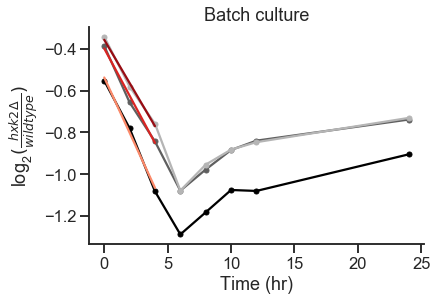

In [260]:
sns.set_context('talk')
sns.set_style('ticks')

f, ax = plt.subplots()

plt.plot([0, 2, 4, 6, 8, 10, 12, 24], np.log2(r2s_0511), color = 'black',
         marker = '.', markersize = 10)
plt.plot([0, 2, 4, 6, 8, 10, 12, 24], np.log2(r2s_0515), color = grays[6],
         marker = '.', markersize = 10)
plt.plot([0, 2, 4, 6, 8, 10, 12, 24], np.log2(r2s_0517), color = grays[3],
         marker = '.', markersize = 10)

xplot = np.array([0, 2, 4])
plt.plot(xplot, (m_0516*xplot) + b_0516, color = reds[8])
plt.plot(xplot, (m_0514*xplot) + b_0514, color = reds[6])
plt.plot(xplot, (m_0510*xplot) + b_0510, color = reds[3])





ax.set_xlabel('Time (hr)')
ax.set_ylabel(r'$\mathregular{log_{2}}(\frac{hxk2\Delta}{wildtype})$')
ax.set_title('Batch culture')

sns.despine()


In [261]:
batch_mean = np.mean([m_0516, m_0514, m_0510])
batch_std = np.std([m_0516, m_0514, m_0510])

print(batch_mean)
print(batch_std)

-0.11601697437782892
0.011909037455262114


In [262]:
[mlag_0516, blag_0516, rlag_0516, plag_0516, serrlag_0516] = stats.linregress(times_0516[3:7], np.log2(r2s_0517[3:7]))

In [263]:
[mlag_0514, blag_0514, rlag_0514, plag_0514, serrlag_0514] = stats.linregress(times_0514[3:7], np.log2(r2s_0515[3:7]))

In [264]:
[mlag_0510, blag_0510, rlag_0516, plag_0510, serrlag_0510] = stats.linregress(times_0510[3:7], np.log2(r2s_0511[3:7]))

In [265]:
times_0510[3:7]

[6.083333, 8.833333, 10.08333, 12.16667]

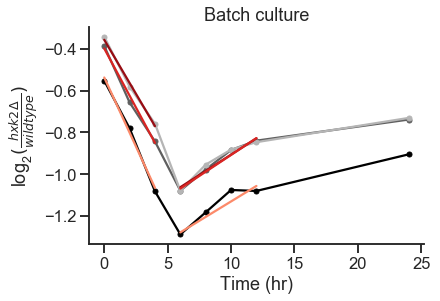

In [266]:
sns.set_context('talk')
sns.set_style('ticks')

f, ax = plt.subplots()

plt.plot([0, 2, 4, 6, 8, 10, 12, 24], np.log2(r2s_0511), color = 'black',
         marker = '.', markersize = 10)
plt.plot([0, 2, 4, 6, 8, 10, 12, 24], np.log2(r2s_0515), color = grays[6],
         marker = '.', markersize = 10)
plt.plot([0, 2, 4, 6, 8, 10, 12, 24], np.log2(r2s_0517), color = grays[3],
         marker = '.', markersize = 10)

xplot = np.array([0, 2, 4])
plt.plot(xplot, (m_0516*xplot) + b_0516, color = reds[8])
plt.plot(xplot, (m_0514*xplot) + b_0514, color = reds[6])
plt.plot(xplot, (m_0510*xplot) + b_0510, color = reds[3])

xplot2 = np.array([6, 8, 10, 12])
plt.plot(xplot2, (mlag_0516*xplot2) + blag_0516, color = reds[8])
plt.plot(xplot2, (mlag_0514*xplot2) + blag_0514, color = reds[6])
plt.plot(xplot2, (mlag_0510*xplot2) + blag_0510, color = reds[3])




ax.set_xlabel('Time (hr)')
ax.set_ylabel(r'$\mathregular{log_{2}}(\frac{hxk2\Delta}{wildtype})$')
ax.set_title('Batch culture')

sns.despine()



In [267]:
diauxy_mean = np.mean([mlag_0516, mlag_0514, mlag_0510])
diauxy_std= np.std([mlag_0516, mlag_0514, mlag_0510])

print(diauxy_mean)
print(diauxy_std)

0.03871617962602519
0.0013265604833315164


In [268]:
times_0516[1:5]

[1.9, 4.016667, 6.183333, 8.066667]

In [269]:
[m0_0516, b0_0516, r0_0516, p0_0516, serr0_0516] = stats.linregress(times_0516[1:5], np.log2(r0s_0517[2:6]))

In [270]:
[m0_0514, b0_0514, r0_0514, p0_0514, serr0_0514] = stats.linregress(times_0514[1:5], np.log2(r0s_0515[2:6]))

In [271]:
[m0_0510, b0_0510, r0_0510, p0_0510, serr0_0510] = stats.linregress(times_0510[1:5], np.log2(r0s_0511[2:6]))

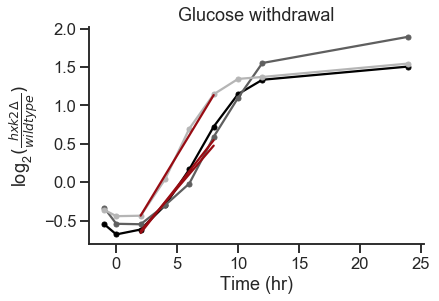

In [272]:
sns.set_context('talk')
sns.set_style('ticks')

f, ax = plt.subplots()

plt.plot([-1, 0, 2, 4, 6, 8, 10, 12, 24], np.log2(r0s_0511), color = 'black',
         marker = '.', markersize = 10)
plt.plot([-1, 0, 2, 4, 6, 8, 10, 12, 24], np.log2(r0s_0515), color = grays[6],
         marker = '.', markersize = 10)
plt.plot([-1, 0, 2, 4, 6, 8, 10, 12, 24], np.log2(r0s_0517), color = grays[3],
         marker = '.', markersize = 10)

xplot = np.array([2, 4, 6, 8])
plt.plot(xplot, (xplot*m0_0516) + b0_0516, color = reds[8])
plt.plot(xplot, (xplot*m0_0514) + b0_0514, color = reds[8])
plt.plot(xplot, (xplot*m0_0510) + b0_0510, color = reds[8])



ax.set_xlabel('Time (hr)')
ax.set_ylabel(r'$\mathregular{log_{2}}(\frac{hxk2\Delta}{wildtype})$')
ax.set_title('Glucose withdrawal')

sns.despine()

In [273]:
starve_mean = np.mean([m0_0516, m0_0514, m0_0510])
starve_std = np.std([m0_0516, m0_0514, m0_0510])

print(starve_mean)
print(starve_std)

0.2160941018911735
0.03290807774632976


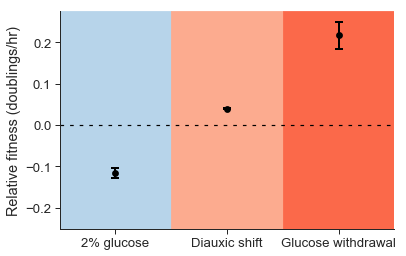

In [274]:
sns.set_context('paper', font_scale = 1.5)
sns.set_style('ticks')

names = ['2% glucose', 'Diauxic shift', 'Glucose withdrawal']

f, ax = plt.subplots()

ax.axvspan(-0.5, 0.5, color = blues[2], alpha = 1)
ax.axvspan(0.5, 1.5, color = reds[2], alpha = 1)
ax.axvspan(1.5, 2.5, color = reds[4], alpha = 1)


plt.axhline(y = 0, color = 'black', linestyle = (0, (3,5)))

plt.errorbar([0, 1, 2], [batch_mean, diauxy_mean, starve_mean], yerr = [batch_std, diauxy_std, starve_std],
            marker = 'o', fmt = 'o', capsize = 4, capthick = 2, elinewidth = 2, markeredgewidth = 2, color = 'black')
ax.set_xlim(-0.5, 2.5)
ax.set_ylim(-0.25, 0.275)
plt.xticks(range(3), names)
ax.set_ylabel('Relative fitness (doublings/hr)')

sns.despine()

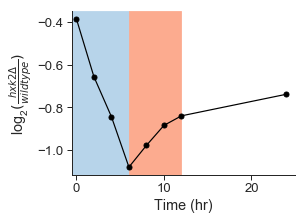

In [275]:
sns.set_context('paper', font_scale = 1.5)
sns.set_style('ticks')

f, ax = plt.subplots(figsize = (4, 3))

plt.plot([0, 2, 4, 6, 8, 10, 12, 24], np.log2(r2s_0515), color = 'black',
         marker = '.', markersize = 10)


ax.axvspan(-5, 6, color = blues[2], alpha = 1)
ax.axvspan(6, 12, color = reds[2], alpha = 1)



ax.set_xlim(-0.5, 25)
ax.set_xlabel('Time (hr)')
ax.set_ylabel(r'$\mathregular{log_{2}}(\frac{hxk2\Delta}{wildtype})$')
#ax.set_title('Batch culture')

sns.despine()

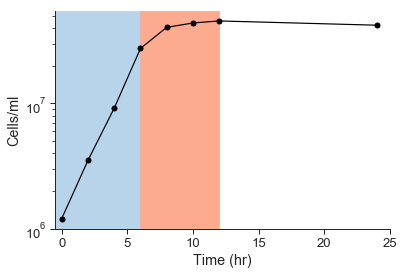

In [276]:
sns.set_context('paper', font_scale = 1.5)
sns.set_style('ticks')

f, ax = plt.subplots()

plt.plot([0, 2, 4, 6, 8, 10, 12, 24], growth_0515, color = 'black',
         marker = '.', markersize = 10)

ax.axvspan(-0.5, 6, color = blues[2], alpha = 1)
ax.axvspan(6, 12, color = reds[2], alpha = 1)





ax.set_xlim(-0.5, 25)
ax.set_yscale('log')
ax.set_xlabel('Time (hr)')
ax.set_ylabel('Cells/ml')

sns.despine()

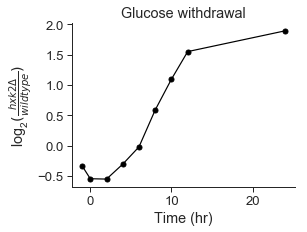

In [277]:
sns.set_context('paper', font_scale = 1.5)
sns.set_style('ticks')

f, ax = plt.subplots(figsize = (4, 3))

plt.plot([-1, 0, 2, 4, 6, 8, 10, 12, 24], np.log2(r0s_0515), color = 'black',
         marker = '.', markersize = 10)



ax.set_xlabel('Time (hr)')
ax.set_ylabel(r'$\mathregular{log_{2}}(\frac{hxk2\Delta}{wildtype})$')
ax.set_title('Glucose withdrawal')

sns.despine()

In [278]:
batch_mean

-0.11601697437782892

In [279]:
diauxy_mean

0.03871617962602519

In [280]:
starve_mean

0.2160941018911735